In [123]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Input, Bidirectional,SimpleRNN, Embedding, Conv1D, LSTM, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split



from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

#print(tf.__version__)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hsibitenda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hsibitenda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [124]:
# df=pd.read_csv('/home/hsibitenda/scratch/harriet/sentimentsall_sentences.csv')
# df=pd.read_csv('/home/hsibitenda/scratch/harriet/sentimentsall_sentences_aspects.csv')
# df=pd.read_csv('/home/hsibitenda/scratch/harriet/sentimentsall_sentences.csv')
# df=pd.read_csv('/home/hsibitenda/scratch/harriet/sentimentsall_sentences_aspects.csv')
df=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiment_sentall_llama32.csv')
# df2=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/social_analysis2.csv')
df2=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey5.csv')
# df2=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey2.csv')

# df7.to_csv('/home/hsibitenda/scratch/harriet/sentiments/sentiments_aspectsall_fine.csv')
df2=df2.astype(str)
df=df.astype(str)

In [125]:
# df.columns

In [126]:
# df2
import pandas as pd

columns=df2.columns
# Initialize counters for each type
topic_counter = 1
theme_counter = 1
emotion_counter = 1

# New column names
new_columns = []

for col in columns:
    if 'To what extent is the topic' in col:
        topic_name = col.split('\'')[1].strip()  # Extract the topic from quotes
        new_columns.append(f'Topic_{topic_counter}: "{topic_name}"')
        topic_counter += 1
    elif 'What is the overall mood or attitude of the post?' in col:
        new_columns.append(f'Emotion_{emotion_counter}')
        emotion_counter += 1
    elif 'Select all themes that describe the post.' in col:
        new_columns.append(f'Theme_{theme_counter}')
        theme_counter += 1
    else:
        new_columns.append(col)

# Assign new column names to the DataFrame
df2.columns = new_columns

# Display the new column names
df2.columns


Index(['Timestamp', 'Participant email', 'Age range',
       'Please select the ethnicity that best describes you. If you identify with more than one, please select all that apply:  [Answer]',
       'Country', 'Topic_1: "science exam questions and reactions"', 'Theme_1',
       'Emotion_1',
       'Topic_2: "nation building through sectoral fostering and intractable cohesion"',
       'Theme_2', 'Emotion_2', 'Topic_3: "pandemic response"', 'Theme_3',
       'Emotion_3', 'Topic_4: "health promotion"', 'Theme_4', 'Emotion_4',
       'Topic_5: "refugee crisis"', 'Theme_5', 'Emotion_5',
       'Topic_6: "justice and distributive problems"', 'Theme_6', 'Emotion_6',
       'Topic_7: "food security"', 'Theme_7', 'Emotion_7',
       'Topic_8: "covid-19 related deaths and testing"', 'Theme_8',
       'Emotion_8',
       'Topic_9: "corruption and governance in developing countries"',
       'Theme_9', 'Emotion_9',
       'Topic_10: "youth empowerment and leadership in africa"', 'Theme_10',
    

In [127]:
import pandas as pd

# Assuming df2 is already defined

# Define the columns to be used for reshaping
id_vars = ['Timestamp', 'Participant email']
value_vars_topics = [col for col in df2.columns if 'Topic' in col]
value_vars_themes = [col for col in df2.columns if 'Theme' in col]
value_vars_emotions = [col for col in df2.columns if 'Emotion' in col]

# Function to extract the topic name from the column name
def extract_topic_name(col_name):
    return col_name.split(':')[1].strip().strip('"')

# Create a combined DataFrame for topics, themes, and emotions with topic names
combined_data = []

# Loop through each topic, theme, and emotion to create combined rows
for i in range(len(value_vars_topics)):
    topic_col = value_vars_topics[i]
    theme_col = value_vars_themes[i]
    emotion_col = value_vars_emotions[i]
    
    topic_name = extract_topic_name(topic_col)
    
    combined_df = df2[id_vars + [topic_col, theme_col, emotion_col]]
    combined_df.columns = id_vars + ['Topic', 'Theme', 'Emotion']
    combined_df['Topic_Name'] = topic_name
    combined_data.append(combined_df)

# Concatenate all the combined data
df_combined = pd.concat(combined_data, ignore_index=True)

# Display the resulting DataFrame
print(df_combined)


              Timestamp     Participant email       Topic             Theme  \
0    7/11/2024 13:14:40       Rlopez2@wpi.edu      Mostly          Security   
1    7/11/2024 13:14:45       khickey@wpi.edu      Mostly         Education   
2    7/11/2024 13:15:32  ashrestha4@gmail.com  Moderately         Education   
3    7/11/2024 13:15:41  pvannostrand@wpi.edu  Not at all         Education   
4    7/11/2024 13:16:12  jcdeoliveira@wpi.edu  Completely         Education   
..                  ...                   ...         ...               ...   
235  7/11/2024 13:24:52    njjosselyn@wpi.edu      Mostly            Health   
236  7/11/2024 13:25:09     omolulana@wpi.edu      Mostly            Hunger   
237  7/11/2024 13:25:29     ewvertina@wpi.edu    Slightly            Health   
238  7/11/2024 13:25:41          lma5@wpi.edu  Completely            Health   
239  7/11/2024 19:03:03    hsibitenda@wpi.edu  Completely  Security, Health   

      Emotion                                Topic_

/tmp/ipykernel_4171490/2215521973.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Topic_Name'] = topic_name
/tmp/ipykernel_4171490/2215521973.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Topic_Name'] = topic_name
/tmp/ipykernel_4171490/2215521973.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [128]:
# Assuming df_combined is your DataFrame

# Drop records where 'Topic_Name' equals 'emerging renewable energy sector'
df_combined = df_combined[df_combined['Topic_Name'] != 'emerging renewable energy sector']

# Now df_combined will contain only the records where 'Topic_Name' is not 'emerging renewable energy sector'
df_combined.shape

(228, 6)

In [129]:
# filtered_df['llama2_labelone'].unique()

In [130]:
import pandas as pd

# Assuming df is already defined with your original DataFrame
############ survey5
# Define the list of specific values to search for
specific_values = [
    "@dsengeh good morning sir; how was ",
    "2/n as his colleagues; the ace team is privy to how promise's career ",
    "world mental health day 2020 comes at a time we're facing many challenges",
    "he is interested in the intersection of education",
    '@kwirirayi plainly; would you say: south africa has no immigrant',
    "@mosholimosholi1 @thabi30420989 @africa_archives the ",
    'artificial intelligencewhere gulf states are exploring',
    '#question = should politicians be held accountable for', 
    "@sc_lumumba @africa_archives our problem in africa",
    'the @yardzim2023 yard youth indaba has begun',
    'dear colleagues thank you for the questions. i cannot',
    "#impactafrica19 is a partnership by the british council ",
    'markets sold off worldwide on friday after south africa',
    'dr elias omondi opongo; sj introduces the role of faith leaders',
    'how much of a problem is inequality in education',
    "andy vermaut shares:water scarcity and drought",
    '@ganymedeworld @bwaleng we are already carrying these',
    'in #africa; what are the unique social contexts that',
    'â€œwhen asked whether alcohol leads to ',
    
    
    
    
    
    

    'qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq'
]

# Create a new DataFrame filtered for rows where 'alltext' begins with any of the specific values
filtered_df = df[df['alltext'].apply(lambda x: any(x.startswith(value) for value in specific_values))]

# Display the resulting DataFrame
print("Filtered DataFrame:")
# print(filtered_df)
filtered_df .shape

Filtered DataFrame:


(19, 55)

In [131]:
filtered_df['alltext'].iloc[0]

'he is interested in the intersection of education; health; and social policy; and has a deep understanding of various social challenges affecting developing countries; especially in west africa. segun is an obama foundation scholar; clinton foundation global initiative fellow;  '

In [132]:
filtered_df['llama2_labelone'].iloc[0]

'health promotion'

In [134]:
# filtered_df 
df21=filtered_df.copy()

In [135]:
df_combined.columns

Index(['Timestamp', 'Participant email', 'Topic', 'Theme', 'Emotion',
       'Topic_Name'],
      dtype='object')

In [136]:
df_combined['Topic_Name'].value_counts()

Topic_Name
science exam questions and reactions                                            12
urban-rural interface and environmental sustainability in sub-saharan africa    12
mental health problem                                                           12
grant management                                                                12
drought and famine in east africa and southeast asia                            12
education inequality marathon                                                   12
political leadership and overcoming obstacles                                   12
overcoming anxiety disorder                                                     12
entrepreneurial innovation challenge                                            12
youth empowerment and leadership in africa                                      12
nation building through sectoral fostering and intractable cohesion             12
corruption and governance in developing countries                           

In [137]:
# df21['llama2_labelone'].unique()

In [138]:
import pandas as pd

# Assuming df21 is your DataFrame

# Define the mapping for renaming
rename_mapping = {
    'sure! based on the keywords provided, i would label this topic as "science exam questions and reactions".': 'science exam questions and reactions',
    '"education inequality marathon: a global problem"': 'education inequality marathon',
    'certainly! based on the keywords provided, i would label this topic as "covid-19 related deaths and testing".':"covid-19 related deaths and testing"
    
}

# Apply the renaming using replace
df21['llama2_labelone'] = df21['llama2_labelone'].replace(rename_mapping)

# Check the unique values after renaming
print(df21['llama2_labelone'].unique())


['health promotion' 'entrepreneurial innovation challenge'
 'grant management' 'justice and distributive problems'
 'mental health problem' 'science exam questions and reactions'
 'food security' 'refugee crisis'
 '"nationbuilding through sectoral fostering and intractable cohesion"'
 'pandemic response' 'covid-19 related deaths and testing'
 '"urban-rural interface and environmental sustainability in sub-saharan africa"'
 'corruption and governance in developing countries'
 'political leadership and overcoming obstacles'
 '"youth empowerment and leadership in africa"'
 'education inequality marathon'
 'drought and famine in east africa and southeast asia'
 'overcoming anxiety disorder' 'fasd (foetal alcohol spectrum disorders)']


In [139]:
# df21['llama2_labelone2'].unique()

In [140]:
# Remove starting and ending quotes from each entry
df_combined['Topic_Name'] = df_combined['Topic_Name'].str.strip('"')
def ensure_double_quotes(topic):
    # Remove any leading/trailing single or double quotes
    cleaned_topic = topic.strip('\'"')
    # Add double quotes around the cleaned topic
    return f'"{cleaned_topic}"'

# Apply the function to the 'Topic_Name' column
df_combined['Topic_Name'] = df_combined['Topic_Name'].apply(ensure_double_quotes)

df_combined['Topic_Name'].unique()

array(['"science exam questions and reactions"',
       '"nation building through sectoral fostering and intractable cohesion"',
       '"pandemic response"', '"health promotion"', '"refugee crisis"',
       '"justice and distributive problems"', '"food security"',
       '"covid-19 related deaths and testing"',
       '"corruption and governance in developing countries"',
       '"youth empowerment and leadership in africa"',
       '"urban-rural interface and environmental sustainability in sub-saharan africa"',
       '"entrepreneurial innovation challenge"',
       '"overcoming anxiety disorder"',
       '"political leadership and overcoming obstacles"',
       '"education inequality marathon"',
       '"drought and famine in east africa and southeast asia"',
       '"grant management"', '"mental health problem"',
       '"fasd (foetal alcohol spectrum disorders)"'], dtype=object)

In [141]:
df_combined.columns

Index(['Timestamp', 'Participant email', 'Topic', 'Theme', 'Emotion',
       'Topic_Name'],
      dtype='object')

In [142]:
# Remove starting and ending quotes from each entry
df21['llama2_labelone'] = df21['llama2_labelone'].str.strip('"')
# Function to ensure double quotes around each string
def ensure_double_quotes(topic):
    # Remove any leading/trailing single or double quotes
    cleaned_topic = topic.strip('\'"')
    # Add double quotes around the cleaned topic
    return f'"{cleaned_topic}"'

# # Apply the function to the 'Topic_Name' column
df21['llama2_labelone'] = df21['llama2_labelone'].apply(ensure_double_quotes)

# Display the updated DataFrame
# print(df)
# df212= df21[['textid', 'Date', 'Views', 'sourcetype', 'alltext','Text_lemma','llama2_labelone2','Bertscore_Labels','Predicted_Categories3', 'Textblob', 'VADER','BERT','Sentiwordnet', 'llama3_sentiment','Common_Sentiment32','Sentiment2_prediction', 'Sentiment2_roberta','Predicted_Labels_roberta', 'Predicted_Sentiment_finetunned']]
df21['llama2_labelone'].unique()

array(['"health promotion"', '"entrepreneurial innovation challenge"',
       '"grant management"', '"justice and distributive problems"',
       '"mental health problem"',
       '"science exam questions and reactions"', '"food security"',
       '"refugee crisis"',
       '"nationbuilding through sectoral fostering and intractable cohesion"',
       '"pandemic response"', '"covid-19 related deaths and testing"',
       '"urban-rural interface and environmental sustainability in sub-saharan africa"',
       '"corruption and governance in developing countries"',
       '"political leadership and overcoming obstacles"',
       '"youth empowerment and leadership in africa"',
       '"education inequality marathon"',
       '"drought and famine in east africa and southeast asia"',
       '"overcoming anxiety disorder"',
       '"fasd (foetal alcohol spectrum disorders)"'], dtype=object)

In [143]:
df21['orignal_topic']=df21[['llama2_labelone']]

In [144]:
# df_combined.dropna

df21.shape

(19, 56)

In [145]:
df_combined.shape

(228, 6)

In [146]:
# Ensure both columns are in lower case and stripped of leading/trailing spaces
df_combined['llama2_labelone'] = df_combined['Topic_Name'].str.strip().str.lower()
df21['llama2_labelone'] = df21['llama2_labelone'].str.strip().str.lower()


In [147]:
# Replace specific topic strings in df_combined to match those in df21
# df_combined['llama2_labelone'] = df_combined['llama2_labelone'].replace({
#     'nationbuilding through sectoral fostering and intractable cohesion': 'nation building through sectoral fostering and intractable cohesion'
# })
# Replace specific topic strings in df_combined to match those in df21
df21['llama2_labelone'] = df21['llama2_labelone'].replace({
    '"nationbuilding through sectoral fostering and intractable cohesion"': '"nation building through sectoral fostering and intractable cohesion"'
})

In [148]:
# Print unique values from both columns to identify discrepancies
print("Unique values in df_combined['llama2_labelone']:")
print(df_combined['llama2_labelone'].unique())

print("\nUnique values in df21['llama2_labelone']:")
print(df21['llama2_labelone'].unique())


Unique values in df_combined['llama2_labelone']:
['"science exam questions and reactions"'
 '"nation building through sectoral fostering and intractable cohesion"'
 '"pandemic response"' '"health promotion"' '"refugee crisis"'
 '"justice and distributive problems"' '"food security"'
 '"covid-19 related deaths and testing"'
 '"corruption and governance in developing countries"'
 '"youth empowerment and leadership in africa"'
 '"urban-rural interface and environmental sustainability in sub-saharan africa"'
 '"entrepreneurial innovation challenge"' '"overcoming anxiety disorder"'
 '"political leadership and overcoming obstacles"'
 '"education inequality marathon"'
 '"drought and famine in east africa and southeast asia"'
 '"grant management"' '"mental health problem"'
 '"fasd (foetal alcohol spectrum disorders)"']

Unique values in df21['llama2_labelone']:
['"health promotion"' '"entrepreneurial innovation challenge"'
 '"grant management"' '"justice and distributive problems"'
 '"mental h

In [149]:
import pandas as pd

# Ensure columns are of string type and strip any leading/trailing spaces
df21['llama2_labelone'] = df21['llama2_labelone'].astype(str).str.strip()
df_combined['Topic_Name'] = df_combined['Topic_Name'].astype(str).str.strip()

# Merging the two DataFrames
merged_df = df21.merge(df_combined, left_on='llama2_labelone', right_on='Topic_Name', how='left')

# Display the shape of the merged DataFrame
print("Shape of the merged DataFrame:", merged_df.shape)

# Optional: Inspect unmatched records
unmatched_records = df21[~df21['llama2_labelone'].isin(df_combined['Topic_Name'])]
print("Unmatched records in df21:", unmatched_records.shape[0])
print(unmatched_records)

Shape of the merged DataFrame: (228, 63)
Unmatched records in df21: 0
Empty DataFrame
Columns: [Unnamed: 0, textid, Date, Views, sourcetype, alltext, Text_emt, Text_emj, Text_langue, Text_translate, Text_langue2, Text_lower, Text_punct, Text_tags, Text_chat, Text_spell, Text_langue3, Text_translate2, Text_token, Text_stop, Text_stem, Text_lemma, berttopic2, cluster_id2, llama2_labelone10, cluster_labelone10, cluster_id, llama2_labelone, cluster_labelone, Unnamed: 0.1, Text_lemma2, Bertscore_Labels, Final_Labels, Predicted_Categories3, polarity, subjectivity, Textblob, VADER, neg, neu, pos, compound, BERT, Sentiment_Score, Sentiwordnet, llama3_sentiment, Emotion, Emotional_Polarity, Common_Sentiment32, Sentiment2, Predicted_Labels, Sentiment2_prediction, Sentiment2_roberta, Predicted_Labels_roberta, Predicted_Sentiment_finetunned, orignal_topic]
Index: []

[0 rows x 56 columns]


In [153]:
merged_df.shape

(228, 63)

In [154]:
merged_df['Topic_Name'].unique()

array(['"health promotion"', '"entrepreneurial innovation challenge"',
       '"grant management"', '"justice and distributive problems"',
       '"mental health problem"',
       '"science exam questions and reactions"', '"food security"',
       '"refugee crisis"',
       '"nation building through sectoral fostering and intractable cohesion"',
       '"pandemic response"', '"covid-19 related deaths and testing"',
       '"urban-rural interface and environmental sustainability in sub-saharan africa"',
       '"corruption and governance in developing countries"',
       '"political leadership and overcoming obstacles"',
       '"youth empowerment and leadership in africa"',
       '"education inequality marathon"',
       '"drought and famine in east africa and southeast asia"',
       '"overcoming anxiety disorder"',
       '"fasd (foetal alcohol spectrum disorders)"'], dtype=object)

In [155]:
df=merged_df.copy()

In [156]:
df1=df.copy()

In [157]:
df12=df1[['textid', 'alltext','Participant email', 'Topic', 'Theme',
       'Emotion_y', 'Topic_Name']]
df12.columns

Index(['textid', 'alltext', 'Participant email', 'Topic', 'Theme', 'Emotion_y',
       'Topic_Name'],
      dtype='object')

In [158]:
df12 = df12.sample(frac=1).reset_index(drop=True)
df12.head(5)


,textid,alltext,Participant email,Topic,Theme,Emotion_y,Topic_Name
0,7499,andy vermaut shares:water scarcity and drought...,Rlopez2@wpi.edu,Completely,Hunger,Negative,"""drought and famine in east africa and southea..."
1,6474,#question = should politicians be held account...,ewvertina@wpi.edu,Mostly,"Security, Health",Negative,"""covid-19 related deaths and testing"""
2,5809,dr elias omondi opongo; sj introduces the role...,ewvertina@wpi.edu,Moderately,Security,Positive,"""political leadership and overcoming obstacles"""
3,5474,how much of a problem is inequality in educati...,Rlopez2@wpi.edu,Completely,"Health, Education",Negative,"""education inequality marathon"""
4,658,â€œwhen asked whether alcohol leads to social ...,lma5@wpi.edu,Completely,Health,Neutral,"""fasd (foetal alcohol spectrum disorders)"""


In [160]:
df.columns

Index(['Unnamed: 0', 'textid', 'Date', 'Views', 'sourcetype', 'alltext',
       'Text_emt', 'Text_emj', 'Text_langue', 'Text_translate', 'Text_langue2',
       'Text_lower', 'Text_punct', 'Text_tags', 'Text_chat', 'Text_spell',
       'Text_langue3', 'Text_translate2', 'Text_token', 'Text_stop',
       'Text_stem', 'Text_lemma', 'berttopic2', 'cluster_id2',
       'llama2_labelone10', 'cluster_labelone10', 'cluster_id',
       'llama2_labelone_x', 'cluster_labelone', 'Unnamed: 0.1', 'Text_lemma2',
       'Bertscore_Labels', 'Final_Labels', 'Predicted_Categories3', 'polarity',
       'subjectivity', 'Textblob', 'VADER', 'neg', 'neu', 'pos', 'compound',
       'BERT', 'Sentiment_Score', 'Sentiwordnet', 'llama3_sentiment',
       'Emotion_x', 'Emotional_Polarity', 'Common_Sentiment32', 'Sentiment2',
       'Predicted_Labels', 'Sentiment2_prediction', 'Sentiment2_roberta',
       'Predicted_Labels_roberta', 'Predicted_Sentiment_finetunned',
       'orignal_topic', 'Timestamp', 'Participant

In [320]:
df=merged_df.copy()

In [321]:
df.shape

(228, 63)

In [323]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample function to select 5 participants randomly based on their email addresses
def sample_participants(df):
    sampled_emails = df['Participant email'].sample(n=5, replace=False, random_state=None).tolist()
    return df[df['Participant email'].isin(sampled_emails)].copy()  # Ensure to work on a copy of the DataFrame

# Function to calculate average topic scores and their counts for a given dataframe
def calculate_avg_scores(df):
    # Ensure 'Topic_Score' column exists
    if 'Topic_Score' not in df.columns:
        score_mapping = {
            'Completely': 5,
            'Mostly': 4,
            'Moderately': 3,
            'Slightly': 2,
            'Not at all': 1
        }
        df['Topic_Score'] = df['Topic'].map(score_mapping)
    
    # Calculate 'Average_Topic_Score' if not present
    if 'Average_Topic_Score' not in df.columns:
        df['Average_Topic_Score'] = df['Topic_Score']  # Assuming it's the same for simplicity
    
    # Round 'Average_Topic_Score' to two decimal places using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'Average_Topic_Score_Rounded'] = df['Average_Topic_Score'].round(2)
    
    return df

# Function to calculate standard deviation for a given dataframe
def calculate_std_dev(df):
    # Ensure 'Topic_Score' column exists
    if 'Topic_Score' not in df.columns:
        score_mapping = {
            'Completely': 5,
            'Mostly': 4,
            'Moderately': 3,
            'Slightly': 2,
            'Not at all': 1
        }
        df['Topic_Score'] = df['Topic'].map(score_mapping)
    
    # Round 'Average_Topic_Score' to two decimal places using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'Average_Topic_Score_Rounded'] = df['Average_Topic_Score'].round(2)
    
    # Calculate standard deviation for Topic_Score
    std_dev_topic_score = df.groupby('Average_Topic_Score_Rounded')['Topic_Score'].std().reset_index()
    std_dev_topic_score.columns = ['Average_Topic_Score_Rounded', 'Std_Dev_Topic_Score']
    
    # Calculate standard deviation for Average_Topic_Score
    std_dev_avg_topic_score = df.groupby('Average_Topic_Score_Rounded')['Average_Topic_Score'].std().reset_index()
    std_dev_avg_topic_score.columns = ['Average_Topic_Score_Rounded', 'Std_Dev_Avg_Topic_Score']
    
    return std_dev_topic_score, std_dev_avg_topic_score

# Generate sample data or load your existing dataset
np.random.seed(0)
# Calculate average topic scores and their counts for all participants
df = calculate_avg_scores(df)


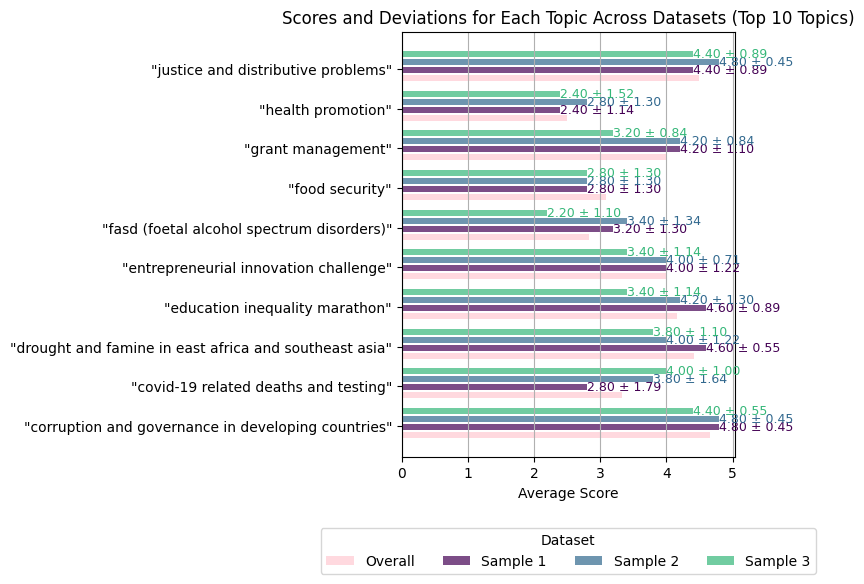

Overall Standard Deviation for Sample 1: 0.98
Overall Standard Deviation for Sample 2: 0.98
Overall Standard Deviation for Sample 3: 0.95


In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample function to select 5 participants randomly based on their email addresses
def sample_participants(df, seed):
    unique_emails = df['Participant email'].drop_duplicates()
    if len(unique_emails) < 5:
        raise ValueError("Not enough unique participants to sample 5.")
    sampled_emails = unique_emails.sample(n=5, replace=False, random_state=seed).tolist()
    return df[df['Participant email'].isin(sampled_emails)].copy()  # Ensure to work on a copy of the DataFrame

# Function to calculate the average, standard deviation, and count of scores for each topic
def calculate_topic_stats(df):
    topic_stats = df.groupby('Topic_Name')['Average_Topic_Score'].agg(['mean', 'std', 'count']).reset_index()
    topic_stats.columns = ['Topic_Name', 'Average_Score', 'Standard_Deviation', 'Count']
    return topic_stats

# Set the random seed for reproducibility
np.random.seed(42)

# Calculate topic statistics for the overall dataset
overall_topic_stats = calculate_topic_stats(df)

# List to store results for samples
sample_results = []

# Repeat sampling process three times with different seeds
seeds = [42, 43, 44]  # Different seeds for different samples

for seed in seeds:
    try:
        # Sample 5 participants
        sample_df = sample_participants(df, seed)
        
        # Calculate topic statistics for the sampled participants
        sample_topic_stats = calculate_topic_stats(sample_df)
        
        # Store results in the sample_results list
        sample_results.append(sample_topic_stats)
    except ValueError as e:
        print(e)
        break

# Combine overall and sample topic stats for plotting
plot_data = overall_topic_stats.copy()
plot_data['Source'] = 'Overall'

for i, sample_stats in enumerate(sample_results):
    sample_stats['Source'] = f'Sample {i + 1}'
    plot_data = pd.concat([plot_data, sample_stats])

# Limit to 10 topics
top_topics = plot_data['Topic_Name'].unique()[:10]
plot_data_filtered = plot_data[plot_data['Topic_Name'].isin(top_topics)]

# Define colors for the samples
colors = plt.cm.viridis(np.linspace(0, 1, len(sample_results) + 1))

# Set up plotting
plt.figure(figsize=(8, 6))

# Define bar width and spacing
bar_width = 0.15
spacing = 0.05
y_positions = np.arange(len(top_topics))  # y positions for the topics

# Plotting the bars for overall data
plt.barh(y_positions - bar_width * (len(sample_results) / 2), 
         plot_data_filtered[plot_data_filtered['Source'] == 'Overall']['Average_Score'], 
         color='pink', alpha=0.6, label='Overall', height=bar_width)

# Plotting the bars for each sample
for i, source in enumerate([f'Sample {i + 1}' for i in range(len(sample_results))]):
    sample_data = plot_data_filtered[plot_data_filtered['Source'] == source]
    plt.barh(y_positions + (i + 1) * (bar_width + spacing) - bar_width * (len(sample_results) / 2), 
             sample_data['Average_Score'], 
             color=colors[i], alpha=0.7, label=source, height=bar_width)
    
    # Add annotations for average scores and standard deviations
    for j, topic in enumerate(sample_data['Topic_Name']):
        avg_score = sample_data['Average_Score'].iloc[j]
        std_dev = sample_data['Standard_Deviation'].iloc[j]
        plt.text(avg_score, y_positions[j] + (i + 1) * (bar_width + spacing) - bar_width * (len(sample_results) / 2), 
                 f'{avg_score:.2f} ± {std_dev:.2f}', 
                 va='center', ha='left', fontsize=9, color=colors[i])

# Customize plot
plt.yticks(y_positions, top_topics)
plt.xlabel('Average Score')
plt.title('Scores and Deviations for Each Topic Across Datasets (Top 10 Topics)')
plt.grid(axis='x')

# Add legend at the bottom
plt.legend(title='Dataset', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

plt.tight_layout()
plt.show()

# Print overall standard deviations for each sample
for i, sample_stats in enumerate(sample_results):
    overall_std_dev = sample_stats['Standard_Deviation'].mean()
    print(f"Overall Standard Deviation for Sample {i + 1}: {overall_std_dev:.2f}")


In [632]:
df=merged_df.copy()

The metrics (Cohen's Kappa, MCC, Pearson Correlation) for the random samples are close to those of the overall dataset, suggesting that the samples are representative of the overall performance.
The t-tests show that there are no statistically significant differences between the metrics of the overall dataset and those of the random samples. This means that the observed variations in metrics among the samples are likely due to random sampling rather than systematic differences.
These results suggest that the overall performance metrics are reliably represented by the samples and that the overall dataset's metrics do not differ significantly from those of the individual samples.

T-Test Results:

Cohen's Kappa: The t-statistic is 0.08 with a p-value of 0.94, indicating no significant difference between the overall kappa value and the sample kappa values. The very high p-value suggests that the differences in Cohen's Kappa are statistically insignificant.

MCC: The t-statistic is 0.05 with a p-value of 0.97, also showing no significant difference between the overall MCC and the sample MCC values. This high p-value indicates that there is no substantial evidence of a difference.

Pearson Correlation: The t-statistic is -0.35 with a p-value of 0.76, which similarly indicates no significant difference between the overall correlation and the sample correlations. The p-value suggests that the observed differences in Pearson Correlation are not statistically significant.

Columns in all_bootstrap_results before melting: Index(['Sample', 'Metric', 'Metric_Value'], dtype='object')
Columns in combined_overall_results: Index(['Sample', 'Metric', 'Metric_Value'], dtype='object')
Columns in combined_samples_aggregated_melted: Index(['Sample', 'Metric', 'Metric_Value'], dtype='object')


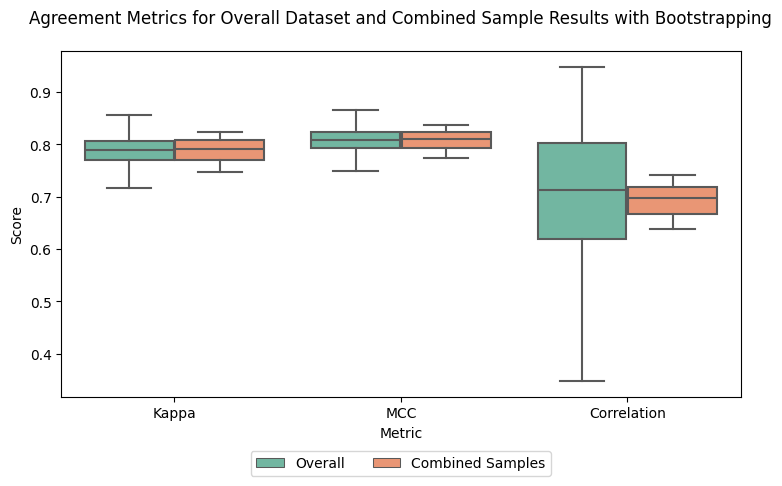

T-test results saved to 't_test_results_combined_samples.csv'.


In [342]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Sample function to select 5 participants randomly based on their email addresses
def sample_participants(df, seed):
    unique_emails = df['Participant email'].drop_duplicates()
    if len(unique_emails) < 5:
        raise ValueError("Not enough unique participants to sample 5.")
    sampled_emails = unique_emails.sample(n=5, replace=False, random_state=seed).tolist()
    return df[df['Participant email'].isin(sampled_emails)].copy()  # Ensure to work on a copy of the DataFrame

# Function to generate Ground Truth Labels based on some criteria
def generate_ground_truth_labels(df):
    threshold = 2.5
    df['Ground_Truth_Label'] = np.where(df['Average_Topic_Score'] > threshold, df['Topic_Name'], 'no_topic')
    return df

# Function to encode text labels into numeric values
def encode_labels(df, column_name):
    df.loc[:, column_name + '_Num'] = pd.factorize(df[column_name])[0]
    return df

# Function to calculate Cohen’s Kappa, MCC, and Pearson Correlation for a given DataFrame
def calculate_agreement_metrics(df):
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(df['Ground_Truth_Label'], df['Topic_Name'])

    # Calculate MCC
    mcc = matthews_corrcoef(df['Ground_Truth_Label'], df['Topic_Name'])
    
    # Calculate Pearson Correlation Coefficient
    correlation = calculate_pearson_correlation(df)
    
    return kappa, mcc, correlation

# Function to calculate Pearson correlation with proper checks
def calculate_pearson_correlation(df):
    # Encode labels
    df = encode_labels(df, 'Ground_Truth_Label')
    df = encode_labels(df, 'Topic_Name')

    try:
        if len(df['Topic_Name_Num']) == len(df['Ground_Truth_Label_Num']):
            if len(np.unique(df['Topic_Name_Num'])) > 1 and len(np.unique(df['Ground_Truth_Label_Num'])) > 1:
                correlation, _ = pearsonr(df['Topic_Name_Num'], df['Ground_Truth_Label_Num'])
            else:
                correlation = np.nan  # Avoid constant input warning
        else:
            correlation = np.nan
    except ValueError:
        correlation = np.nan  # Handle cases where Pearson correlation cannot be computed

    return correlation

# Set the random seed for reproducibility
np.random.seed(42)

# Generate ground truth labels
df = generate_ground_truth_labels(df)

# List to store results for samples and sampled DataFrames
sample_results = []
sample_dfs = []

# Repeat sampling process three times with different seeds
seeds = [42, 43, 44]  # Different seeds for different samples

for seed in seeds:
    try:
        # Sample 5 participants
        sample_df = sample_participants(df, seed)
        sample_dfs.append(sample_df)
        
        # Calculate metrics for the sampled participants
        sample_kappa, sample_mcc, sample_correlation = calculate_agreement_metrics(sample_df)
        
        # Store results in the sample_results list
        sample_results.append({
            'Sample': f'Sample {seed}',
            'Kappa': sample_kappa,
            'MCC': sample_mcc,
            'Correlation': sample_correlation
        })
    except ValueError as e:
        print(e)
        continue

# Perform bootstrap sampling
def bootstrap_sampling(df, n_iterations=1000, seed=42, replace=True):
    np.random.seed(seed)
    bootstrap_metrics = {'Kappa': [], 'MCC': [], 'Correlation': []}
    
    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=replace)
        kappa, mcc, correlation = calculate_agreement_metrics(bootstrap_sample)
        bootstrap_metrics['Kappa'].append(kappa)
        bootstrap_metrics['MCC'].append(mcc)
        bootstrap_metrics['Correlation'].append(correlation)
    
    return pd.DataFrame(bootstrap_metrics)

# Bootstrap sampling for overall dataset (with replacement)
bootstrap_results_overall = bootstrap_sampling(df, replace=True)

# Bootstrap sampling for each sample (without replacement)
bootstrap_results_samples = []
for seed, sample_df in zip(seeds, sample_dfs):
    bootstrap_sample_result = bootstrap_sampling(sample_df, replace=False)
    bootstrap_sample_result['Sample'] = f'Sample {seed}'
    bootstrap_results_samples.append(bootstrap_sample_result)

# Create DataFrame for combined samples without replacement
combined_samples = pd.concat(bootstrap_results_samples)
combined_samples_aggregated = combined_samples.groupby('Sample').mean().reset_index()
combined_samples_aggregated['Sample'] = 'Combined Samples'

# Convert combined samples aggregated DataFrame to long format
combined_samples_aggregated_melted = combined_samples_aggregated.melt(id_vars=['Sample'], var_name='Metric', value_name='Metric_Value')

# Convert overall results to long format
combined_overall_results = pd.DataFrame({
    'Sample': ['Overall'] * len(bootstrap_results_overall),
    'Kappa': bootstrap_results_overall['Kappa'],
    'MCC': bootstrap_results_overall['MCC'],
    'Correlation': bootstrap_results_overall['Correlation']
}).melt(id_vars=['Sample'], var_name='Metric', value_name='Metric_Value')

# Combine all results for plotting
all_bootstrap_results = pd.concat([combined_overall_results, combined_samples_aggregated_melted])

# Inspect column names before melting
print("Columns in all_bootstrap_results before melting:", all_bootstrap_results.columns)
print("Columns in combined_overall_results:", combined_overall_results.columns)
print("Columns in combined_samples_aggregated_melted:", combined_samples_aggregated_melted.columns)

# Melt the DataFrame for seaborn boxplot
all_bootstrap_results_melted = all_bootstrap_results

# Calculate the mean values for annotation
mean_values = all_bootstrap_results_melted.groupby(['Sample', 'Metric']).mean().reset_index()

# Plot boxplot
plt.figure(figsize=(8, 5))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Metric_Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)

# Annotate each boxplot with mean values
for i, row in mean_values.iterrows():
    x_pos = list(mean_values['Metric'].unique()).index(row['Metric'])
    # ax.text(x_pos, row['Metric_Value'] + 0.05, f"{row['Metric_Value']:.2f} ({row['Sample']})", ha='center', va='bottom', fontsize=9, color='black', rotation=0)

# Add the legend at the bottom
plt.title('Agreement Metrics for Overall Dataset and Combined Sample Results with Bootstrapping', pad=20)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.5)

# Move the legend to the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)

plt.show()

# Statistical Testing: T-tests between the average of combined samples and the overall dataset
t_test_results = {'Sample': [], 'Metric': [], 'T-Statistic': [], 'P-Value': []}

for metric in ['Kappa', 'MCC', 'Correlation']:
    combined_samples_metric = combined_samples[metric]
    overall_data_metric = bootstrap_results_overall[metric]
    
    if len(combined_samples_metric) > 1 and len(overall_data_metric) > 1:
        stat, p_value = ttest_ind(combined_samples_metric, overall_data_metric)
        t_test_results['Sample'].append('Overall vs. Combined Samples')
        t_test_results['Metric'].append(metric)
        t_test_results['T-Statistic'].append(stat)
        t_test_results['P-Value'].append(p_value)
    else:
        t_test_results['Sample'].append('Overall vs. Combined Samples')
        t_test_results['Metric'].append(metric)
        t_test_results['T-Statistic'].append(np.nan)
        t_test_results['P-Value'].append(np.nan)

# Create DataFrame for t-test results
t_test_results_df = pd.DataFrame(t_test_results)

# Save the t-test results to a CSV file
t_test_results_df.to_csv('t_test_results_combined_samples.csv', index=False)

print("T-test results saved to 't_test_results_combined_samples.csv'.")


In [343]:
mean_values

,Sample,Metric,Metric_Value
0,Combined Samples,Correlation,0.692003
1,Combined Samples,Kappa,0.787638
2,Combined Samples,MCC,0.807613
3,Overall,Correlation,0.704420
4,Overall,Kappa,0.788453
5,Overall,MCC,0.808177


In [336]:
t_test_results_df

,Sample,Metric,T-Statistic,P-Value
0,Overall vs. Combined Samples,Kappa,-0.739622,0.459573
1,Overall vs. Combined Samples,MCC,-0.613714,0.539439
2,Overall vs. Combined Samples,Correlation,-2.561040,0.010472


In [203]:
df.columns

Index(['Participant email', 'Average_Topic_Score', 'Topic_Name',
       'Ground_Truth_Label', 'Ground_Truth_Label_Num', 'Topic_Name_Num',
       'Jaccard_Similarity'],
      dtype='object')

In [193]:
df['Topic_Name'].unique()

array(['"health promotion"', '"entrepreneurial innovation challenge"',
       '"grant management"', '"justice and distributive problems"',
       '"mental health problem"',
       '"science exam questions and reactions"', '"food security"',
       '"refugee crisis"',
       '"nation building through sectoral fostering and intractable cohesion"',
       '"pandemic response"', '"covid-19 related deaths and testing"',
       '"urban-rural interface and environmental sustainability in sub-saharan africa"',
       '"corruption and governance in developing countries"',
       '"political leadership and overcoming obstacles"',
       '"youth empowerment and leadership in africa"',
       '"education inequality marathon"',
       '"drought and famine in east africa and southeast asia"',
       '"overcoming anxiety disorder"',
       '"fasd (foetal alcohol spectrum disorders)"'], dtype=object)

In [194]:
df['Ground_Truth_Label'].unique()

array(['no_topic', '"health promotion"',
       '"entrepreneurial innovation challenge"', '"grant management"',
       '"justice and distributive problems"', '"mental health problem"',
       '"science exam questions and reactions"', '"food security"',
       '"refugee crisis"',
       '"nation building through sectoral fostering and intractable cohesion"',
       '"pandemic response"', '"covid-19 related deaths and testing"',
       '"urban-rural interface and environmental sustainability in sub-saharan africa"',
       '"corruption and governance in developing countries"',
       '"political leadership and overcoming obstacles"',
       '"youth empowerment and leadership in africa"',
       '"education inequality marathon"',
       '"drought and famine in east africa and southeast asia"',
       '"overcoming anxiety disorder"',
       '"fasd (foetal alcohol spectrum disorders)"'], dtype=object)

In [92]:
df['llama2_labelone'] = df[['llama2_labelone_y']]

In [109]:
df['llama2_labelone'].unique()

array(['"health promotion"', '"entrepreneurial innovation challenge"',
       '"grant management"', '"justice and distributive problems"',
       '"mental health problem"',
       '"science exam questions and reactions"', '"food security"',
       '"refugee crisis"',
       '"nation building through sectoral fostering and intractable cohesion"',
       '"pandemic response"', '"covid-19 related deaths and testing"',
       '"urban-rural interface and environmental sustainability in sub-saharan africa"',
       '"corruption and governance in developing countries"',
       '"political leadership and overcoming obstacles"',
       '"youth empowerment and leadership in africa"',
       '"education inequality marathon"',
       '"drought and famine in east africa and southeast asia"',
       '"overcoming anxiety disorder"',
       '"fasd (foetal alcohol spectrum disorders)"'], dtype=object)

In [525]:
# Function to adjust emotions to only three labels
# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion.lower():
        return 'positive'
    elif 'negative' in emotion.lower():
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'Emotion_y' column
df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)

# Check the unique values to ensure only three labels remain
print(df['Emotion_y'].unique())

['neutral' 'positive' 'negative']


In [526]:
df['Emotion_y'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [527]:
df.shape

(228, 69)

In [120]:
df=merged_df.copy()
df['BERT-nlptown']=df[['BERT']]
df['finetunned_BERT']=df[['Sentiment2_prediction']]
df['finetunned_RoBERTa']=df[['Sentiment2_roberta']]
df['finetunned_Llama3']=df[['Predicted_Sentiment_finetunned']]
# Define the list of sentiment columns


In [291]:
print(all_bootstrap_results_melted['Sample'].value_counts())


Sample
Overall Dataset    3000
Sample 1           3000
Sample 2           3000
Sample 3           3000
Name: count, dtype: int64


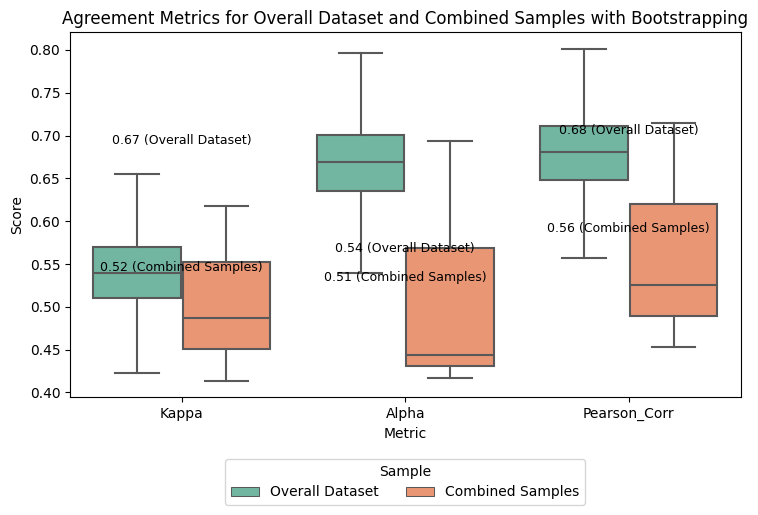

T-test results saved to 't_test_results.csv'.


In [344]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import cohen_kappa_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# Example seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming df is your DataFrame
df = merged_df.copy()

# Convert Emotion_y to lowercase and remove any quotes
df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'Emotion_y' column
df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)

# Convert Emotion_y to numerical form for scoring
emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# Function to create samples with different seeds
def create_samples(df, seeds, n_participants=5):
    samples = []
    for seed in seeds:
        np.random.seed(seed)
        participants = df['textid'].dropna().unique()
        sample_participants = np.random.choice(participants, size=n_participants, replace=False)
        sample_df = df[df['textid'].isin(sample_participants)]
        samples.append(sample_df)
    return samples

# Function to compute agreement metrics for a DataFrame
def compute_agreement_metrics(df):
    def get_mode(x):
        if not x.empty:
            mode_result = stats.mode(x, keepdims=False)
            if hasattr(mode_result.mode, '__iter__'):
                return mode_result.mode[0]
            else:
                return mode_result.mode
        return None
    
    mode_by_text = df.groupby('textid')['Emotion_Score'].apply(get_mode).reset_index()
    mode_by_text.rename(columns={'Emotion_Score': 'Mode_Score'}, inplace=True)
    
    df = pd.merge(df, mode_by_text, on='textid', how='left')
    df.dropna(subset=['Mode_Score'], inplace=True)
    
    if df.empty:
        return np.nan, np.nan, np.nan
    
    df['Ground_Truth_Numeric'] = df['Mode_Score']
    df['Emotion_Score_Numeric'] = df['Emotion_Score']
    
    emotion_scores = df['Emotion_Score_Numeric']
    ground_truth_scores = df['Ground_Truth_Numeric']
    
    kappa = cohen_kappa_score(emotion_scores, ground_truth_scores)
    alpha = krippendorff.alpha(reliability_data=[emotion_scores, ground_truth_scores], level_of_measurement='ordinal')
    
    if len(emotion_scores) > 1 and len(ground_truth_scores) > 1 and np.std(emotion_scores) > 0 and np.std(ground_truth_scores) > 0:
        pearson_corr, _ = pearsonr(emotion_scores, ground_truth_scores)
    else:
        pearson_corr = np.nan
    
    return kappa, alpha, pearson_corr

# Function for bootstrap sampling
def bootstrap_sampling(df, n_iterations=1000, seed=42, replace=True):
    np.random.seed(seed)
    bootstrap_metrics = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': []}
    
    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=replace)
        kappa, alpha, pearson_corr = compute_agreement_metrics(bootstrap_sample)
        bootstrap_metrics['Kappa'].append(kappa)
        bootstrap_metrics['Alpha'].append(alpha)
        bootstrap_metrics['Pearson_Corr'].append(pearson_corr)
    
    return pd.DataFrame(bootstrap_metrics)

# Define seeds for each sample
seeds = [42, 43, 44]

# Generate samples with different seeds
samples = create_samples(df, seeds)

# Collect metrics for each sample and the overall dataset
metrics = {'Sample': [], 'Metric': [], 'Value': []}

# Bootstrap sampling for the overall dataset
bootstrap_results_overall = bootstrap_sampling(df, replace=True)

# Add metrics for the overall dataset
metrics['Sample'].extend(['Overall Dataset'] * 3)
metrics['Metric'].extend(["Cohen's Kappa", "Krippendorff's Alpha", "Pearson's Correlation"])
metrics['Value'].extend([bootstrap_results_overall[metric].mean() for metric in ['Kappa', 'Alpha', 'Pearson_Corr']])

# Perform bootstrap sampling without replacement for each sample and calculate average metrics
combined_sample_results = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': []}
for i, sample_df in enumerate(samples):
    bootstrap_results_sample = bootstrap_sampling(sample_df, replace=False)
    combined_sample_results['Kappa'].append(bootstrap_results_sample['Kappa'].mean())
    combined_sample_results['Alpha'].append(bootstrap_results_sample['Alpha'].mean())
    combined_sample_results['Pearson_Corr'].append(bootstrap_results_sample['Pearson_Corr'].mean())

# Calculate average metrics for combined samples
combined_sample_avg = {metric: np.mean(combined_sample_results[metric]) for metric in combined_sample_results}

# Add metrics for the combined sample results
metrics['Sample'].extend(['Combined Samples'] * 3)
metrics['Metric'].extend(["Cohen's Kappa", "Krippendorff's Alpha", "Pearson's Correlation"])
metrics['Value'].extend([combined_sample_avg[metric] for metric in ['Kappa', 'Alpha', 'Pearson_Corr']])

# Create DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame for seaborn boxplot
all_bootstrap_results_melted = pd.concat([
    bootstrap_results_overall.assign(Sample='Overall Dataset'),
    pd.DataFrame({metric: combined_sample_results[metric] for metric in combined_sample_results}).assign(Sample='Combined Samples')
])

# Melt the results for plotting
all_bootstrap_results_melted = all_bootstrap_results_melted.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 5))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)

# Calculate the mean values for annotation
mean_values = all_bootstrap_results_melted.groupby(['Sample', 'Metric']).mean().reset_index()

# Annotate each boxplot with mean values
for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, sample in enumerate(mean_values['Sample'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['Sample'] == sample)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0
            ax.text(x_pos, y + 0.02, f"{y:.2f} ({sample})", ha='center', va='bottom', fontsize=9, color='black', rotation=0)

# Add title and labels
plt.title("Agreement Metrics for Overall Dataset and Combined Samples with Bootstrapping")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.5)  # Adjust padding to prevent overlap

# Add the legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, title='Sample')

# Save the plot
plt.savefig('agreement_metrics_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

# Statistical Testing: T-tests between the average of all samples and the overall dataset
t_test_results = {'Sample': [], 'Metric': [], 'T-Statistic': [], 'P-Value': []}

for metric in ['Kappa', 'Alpha', 'Pearson_Corr']:
    sample_averages = pd.Series(combined_sample_results[metric]).dropna()
    overall_data = bootstrap_results_overall[metric].dropna()
    
    if len(sample_averages) > 1 and len(overall_data) > 1:
        stat, p_value = ttest_ind(sample_averages, overall_data)
        t_test_results['Sample'].append('Overall vs. Combined Samples')
        t_test_results['Metric'].append(metric)
        t_test_results['T-Statistic'].append(stat)
        t_test_results['P-Value'].append(p_value)
    else:
        t_test_results['Sample'].append('Overall vs. Combined Samples')
        t_test_results['Metric'].append(metric)
        t_test_results['T-Statistic'].append(np.nan)
        t_test_results['P-Value'].append(np.nan)

# Create DataFrame for t-test results
t_test_results_df = pd.DataFrame(t_test_results)

# Save the t-test results to a CSV file
t_test_results_df.to_csv('t_test_results.csv', index=False)

print("T-test results saved to 't_test_results.csv'.")


In [345]:
t_test_results_df

,Sample,Metric,T-Statistic,P-Value
0,Overall vs. Combined Samples,Kappa,-1.363855,1.729198e-01
1,Overall vs. Combined Samples,Alpha,-5.182376,2.649270e-07
2,Overall vs. Combined Samples,Pearson_Corr,-4.149621,3.613308e-05


In [346]:
mean_values

,Sample,Metric,Value
0,Combined Samples,Alpha,0.518132
1,Combined Samples,Kappa,0.506107
2,Combined Samples,Pearson_Corr,0.564340
3,Overall Dataset,Alpha,0.666807
4,Overall Dataset,Kappa,0.540698
5,Overall Dataset,Pearson_Corr,0.678450


In [316]:
metrics_df

,Sample,Metric,Value
0,Overall Dataset,Cohen's Kappa,0.540698
1,Overall Dataset,Krippendorff's Alpha,0.666807
2,Overall Dataset,Pearson's Correlation,0.678450
3,Combined Samples,Cohen's Kappa,0.506107
4,Combined Samples,Krippendorff's Alpha,0.518132
5,Combined Samples,Pearson's Correlation,0.564340


In [574]:
df['Ground_Truth_Numeric'].unique()

array([ 1, -1,  0])

In [571]:
df['Predicted_Numeric'].unique()

array([ 1,  0, -1])

In [573]:
df['Predicted_Score'].unique()

array([ 1,  0, -1])

In [481]:
sample1_df['Participant email'].unique()
# sample1_df.shape

array(['khickey@wpi.edu', 'ashrestha4@gmail.com', 'pvannostrand@wpi.edu',
       'rhu@wpi.edu', 'ewvertina@wpi.edu'], dtype=object)

In [482]:
sample2_df['Participant email'].unique()
# sample2_df.shape

array(['pvannostrand@wpi.edu', 'rhu@wpi.edu', 'omolulana@wpi.edu',
       'lma5@wpi.edu'], dtype=object)

In [483]:
sample3_df['Participant email'].unique()
# sample3_df.shape

array(['Rlopez2@wpi.edu', 'khickey@wpi.edu', 'pvannostrand@wpi.edu',
       'rhu@wpi.edu'], dtype=object)

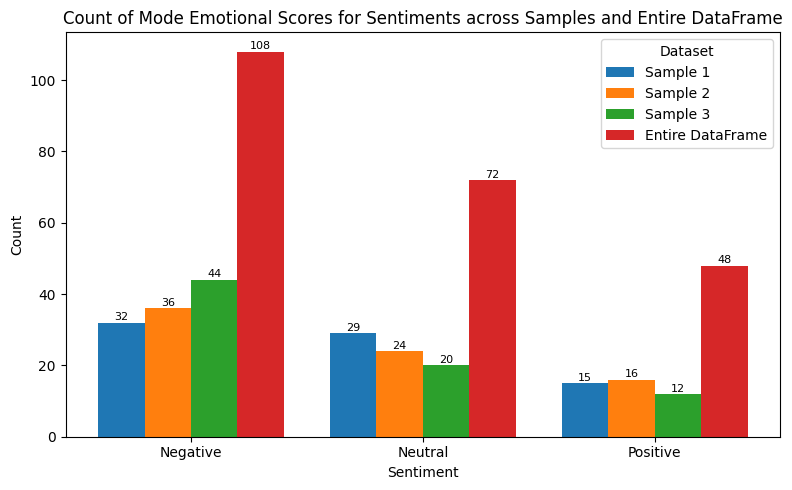

Sample 1 shape: (76, 65)
Sample 2 shape: (76, 65)
Sample 3 shape: (76, 65)


In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Sample emotion mapping (replace with your actual mapping)
emotion_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# Function to select 5 participants randomly based on their email addresses
def sample_participants(df, seed, n=5):
    sampled_emails = df['Participant email'].sample(n=n, replace=False, random_state=seed).tolist()
    return df[df['Participant email'].isin(sampled_emails)].copy()

# Function to calculate emotional scores (map 'Emotion_y' to numeric values)
def calculate_emotion_scores(df):
    df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)
    return df

# Function to calculate mode emotional score for each text entry
def calculate_mode_emotion_by_text(df):
    def get_mode(x):
        if not x.empty:
            mode_result = stats.mode(x, keepdims=False)
            # Handle case where mode_result.mode is not an array
            if hasattr(mode_result.mode, '__iter__'):
                return mode_result.mode[0]
            else:
                return mode_result.mode
        return None
    
    mode_by_text = df.groupby('textid')['Emotion_Score'].apply(get_mode).reset_index()
    mode_by_text.rename(columns={'Emotion_Score': 'Mode_Score'}, inplace=True)
    return mode_by_text

# Sample three sets of 5 participants each with fixed random seeds
sample1_df = sample_participants(df, seed=1)
sample2_df = sample_participants(df, seed=2)
sample3_df = sample_participants(df, seed=3)

# Adjust samples to ensure same number of records
min_records = min(len(sample1_df), len(sample2_df), len(sample3_df))
sample1_df = sample1_df.sample(n=min_records, random_state=42)
sample2_df = sample2_df.sample(n=min_records, random_state=43)
sample3_df = sample3_df.sample(n=min_records, random_state=44)

# Calculate emotional scores for each sample
sample1_df = calculate_emotion_scores(sample1_df)
sample2_df = calculate_emotion_scores(sample2_df)
sample3_df = calculate_emotion_scores(sample3_df)

# Calculate mode emotional scores for each sample
mode_sample1 = calculate_mode_emotion_by_text(sample1_df)
mode_sample2 = calculate_mode_emotion_by_text(sample2_df)
mode_sample3 = calculate_mode_emotion_by_text(sample3_df)

# Merge mode scores back into the original samples
sample1_df = pd.merge(sample1_df, mode_sample1, on='textid', how='left')
sample2_df = pd.merge(sample2_df, mode_sample2, on='textid', how='left')
sample3_df = pd.merge(sample3_df, mode_sample3, on='textid', how='left')

# Drop rows with NaN Mode_Score
sample1_df.dropna(subset=['Mode_Score'], inplace=True)
sample2_df.dropna(subset=['Mode_Score'], inplace=True)
sample3_df.dropna(subset=['Mode_Score'], inplace=True)

# Calculate counts of mode emotional scores for each sample
counts_sample1 = sample1_df['Mode_Score'].value_counts().sort_index()
counts_sample2 = sample2_df['Mode_Score'].value_counts().sort_index()
counts_sample3 = sample3_df['Mode_Score'].value_counts().sort_index()

# Calculate emotional scores for entire dataframe
df = calculate_emotion_scores(df)

# Calculate mode emotional scores for entire dataframe
mode_df = calculate_mode_emotion_by_text(df)

# Merge mode scores back into the original dataframe
df = pd.merge(df, mode_df, on='textid', how='left')
df.dropna(subset=['Mode_Score'], inplace=True)

# Calculate counts of mode emotional scores for entire dataframe
counts_df = df['Mode_Score'].value_counts().sort_index()

# Prepare data for plotting
datasets = ['Sample 1', 'Sample 2', 'Sample 3', 'Entire DataFrame']
emotions = ['Negative', 'Neutral', 'Positive']

# Initialize dictionary to hold count data for plotting
counts_dict = {dataset: [] for dataset in datasets}

# Fill the dictionary with counts for each dataset
for dataset, counts in zip(datasets, [counts_sample1, counts_sample2, counts_sample3, counts_df]):
    for emotion in emotions:
        count = counts.get(emotion_mapping[emotion], 0)
        counts_dict[dataset].append(count)

# Plotting
plt.figure(figsize=(8, 5))

bar_width = 0.2
index = np.arange(len(emotions))

# Plot bars for each dataset
for i, dataset in enumerate(datasets):
    bars = plt.bar(index + i * bar_width, counts_dict[dataset], bar_width, label=dataset)
    # Add labels above each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height}', ha='center', va='bottom', fontsize=8)

# Customize plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Mode Emotional Scores for Sentiments across Samples and Entire DataFrame')
plt.xticks(index + bar_width * 1.5, emotions)
plt.legend(title='Dataset')

plt.tight_layout()
plt.show()

# Print the shapes of the sample datasets to ensure they have the same number of records
print(f"Sample 1 shape: {sample1_df.shape}")
print(f"Sample 2 shape: {sample2_df.shape}")
print(f"Sample 3 shape: {sample3_df.shape}")


In [181]:
sample1_df.shape

(76, 68)

In [183]:
sample2_df.shape

(76, 68)

In [184]:
sample3_df.shape

(76, 68)

Overall Deviation for Sample 1: 0.00
Overall Deviation for Sample 2: 0.05
Overall Deviation for Sample 3: -0.05


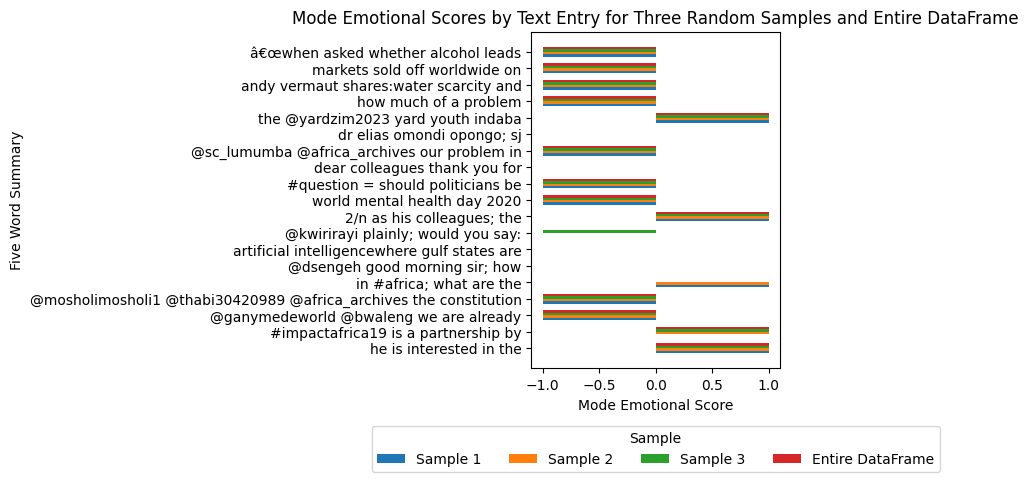

In [214]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Sample emotion mapping
emotion_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# Function to select 5 participants randomly based on their email addresses
def sample_participants(df):
    sampled_emails = df['Participant email'].sample(n=5, replace=False, random_state=None).tolist()
    return df[df['Participant email'].isin(sampled_emails)].copy()

# Function to calculate emotional scores (map 'Emotion_y' to numeric values)
def calculate_emotion_scores(df):
    df = df.copy()  # Ensure we're working with a copy
    df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)
    return df

# Function to calculate mode emotional score for each text entry
def calculate_mode_emotion_by_text(df):
    def get_mode(x):
        if not x.empty:
            mode_result = stats.mode(x, keepdims=False)
            # Handle case where mode_result.mode is not an array
            if hasattr(mode_result.mode, '__iter__'):
                return mode_result.mode[0]
            else:
                return mode_result.mode
        return None
    
    mode_by_text = df.groupby('textid')['Emotion_Score'].apply(get_mode).reset_index()
    return mode_by_text

# Function to calculate counts and standard deviation for each text entry
def calculate_counts_and_std(df):
    counts_by_text = df.groupby('textid')['Emotion_Score'].value_counts().unstack(fill_value=0)
    std_by_text = df.groupby('textid')['Emotion_Score'].std().reindex(counts_by_text.index)
    return counts_by_text, std_by_text

# Function to calculate deviations from the overall mode
def calculate_deviation(mode_sample, mode_df):
    deviations = {}
    for textid in mode_df['textid']:
        if textid in mode_sample['textid'].values:
            overall_mode = mode_df[mode_df['textid'] == textid]['Emotion_Score'].values[0]
            sample_mode = mode_sample[mode_sample['textid'] == textid]['Emotion_Score'].values[0]
            deviations[textid] = sample_mode - overall_mode
        else:
            deviations[textid] = None
    return deviations

# Calculate overall deviation for each sample
def calculate_overall_deviation(deviation_dict):
    valid_deviations = [deviation for deviation in deviation_dict.values() if deviation is not None]
    if valid_deviations:
        return np.mean(valid_deviations)
    return None

# Function to create a new column with five-word summaries
def create_five_word_summary(text):
    words = text.split()
    return ' '.join(words[:5]) if len(words) >= 5 else text

# Sample data
np.random.seed(0)

# Select ten textids
ten_textids = df['textid'].unique()#[:10]

# Filter the dataframe to include only the ten textids
df_filtered = df[df['textid'].isin(ten_textids)].copy()

# Create the five-word summaries column
df_filtered['five_word_summary'] = df_filtered['alltext'].apply(create_five_word_summary)

# Sample three sets of 5 participants each
sample1_df = sample_participants(df_filtered)
sample2_df = sample_participants(df_filtered)
sample3_df = sample_participants(df_filtered)

# Calculate emotional scores for each sample
sample1_df = calculate_emotion_scores(sample1_df)
sample2_df = calculate_emotion_scores(sample2_df)
sample3_df = calculate_emotion_scores(sample3_df)

# Calculate mode emotional score by text for each sample
mode_sample1 = calculate_mode_emotion_by_text(sample1_df)
mode_sample2 = calculate_mode_emotion_by_text(sample2_df)
mode_sample3 = calculate_mode_emotion_by_text(sample3_df)

# Calculate counts and standard deviations for each sample
counts_sample1, std_sample1 = calculate_counts_and_std(sample1_df)
counts_sample2, std_sample2 = calculate_counts_and_std(sample2_df)
counts_sample3, std_sample3 = calculate_counts_and_std(sample3_df)

# Calculate emotional scores for the entire filtered dataframe
df_filtered = calculate_emotion_scores(df_filtered)

# Calculate mode emotional score by text for the entire dataframe
mode_df = calculate_mode_emotion_by_text(df_filtered)

# Calculate counts and standard deviations for the entire filtered dataframe
counts_df, std_df = calculate_counts_and_std(df_filtered)

# Calculate deviations from the overall mode
deviation_sample1 = calculate_deviation(mode_sample1, mode_df)
deviation_sample2 = calculate_deviation(mode_sample2, mode_df)
deviation_sample3 = calculate_deviation(mode_sample3, mode_df)

# Calculate overall deviations
overall_deviation_sample1 = calculate_overall_deviation(deviation_sample1)
overall_deviation_sample2 = calculate_overall_deviation(deviation_sample2)
overall_deviation_sample3 = calculate_overall_deviation(deviation_sample3)

print(f"Overall Deviation for Sample 1: {overall_deviation_sample1:.2f}")
print(f"Overall Deviation for Sample 2: {overall_deviation_sample2:.2f}")
print(f"Overall Deviation for Sample 3: {overall_deviation_sample3:.2f}")

# Plotting
plt.figure(figsize=(8, 5))

bar_width = 0.15
spacing = 0.15
index = np.arange(len(ten_textids))

# Plot bars for mode emotional score for each text and sample
labels_outside_bars = []

for i, (mode_data, label) in enumerate(
    zip([mode_sample1, mode_sample2, mode_sample3, mode_df],
        ['Sample 1', 'Sample 2', 'Sample 3', 'Entire DataFrame'])
):
    mode_scores = [mode_data[mode_data['textid'] == textid]['Emotion_Score'].values[0] if not mode_data[mode_data['textid'] == textid]['Emotion_Score'].empty else None for textid in ten_textids]
    bars = plt.barh(index + (i - 1.5) * bar_width, mode_scores, bar_width, label=label)

# Customize plot
plt.xlabel('Mode Emotional Score')
plt.ylabel('Five Word Summary')
plt.title('Mode Emotional Scores by Text Entry for Three Random Samples and Entire DataFrame')
plt.yticks(index, df_filtered[df_filtered['textid'].isin(ten_textids)]['five_word_summary'].unique())
plt.legend(title='Sample', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

plt.tight_layout()
plt.show()


    Unnamed: 0 textid                       Date Views sourcetype  \
0         1009   6332  2021-02-11 06:06:07+00:00     2    twitter   
1         1009   6332  2021-02-11 06:06:07+00:00     2    twitter   
2         1009   6332  2021-02-11 06:06:07+00:00     2    twitter   
3         1009   6332  2021-02-11 06:06:07+00:00     2    twitter   
4         1009   6332  2021-02-11 06:06:07+00:00     2    twitter   
..         ...    ...                        ...   ...        ...   
223      18601    658  2019-07-14 21:01:37+00:00    17    twitter   
224      18601    658  2019-07-14 21:01:37+00:00    17    twitter   
225      18601    658  2019-07-14 21:01:37+00:00    17    twitter   
226      18601    658  2019-07-14 21:01:37+00:00    17    twitter   
227      18601    658  2019-07-14 21:01:37+00:00    17    twitter   

                                               alltext  \
0    he is interested in the intersection of educat...   
1    he is interested in the intersection of educat... 

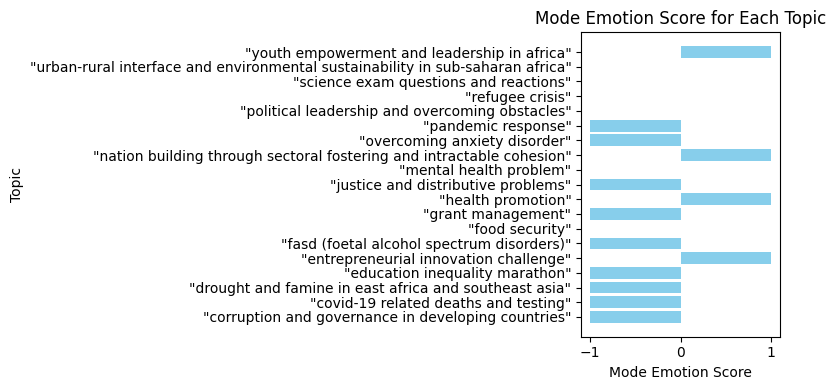

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and named df

# Mapping emotions to numeric values
emotion_mapping = {
    'Neutral': 0,
    'Positive': 1,
    'Negative': -1
}

# Reverse mapping for emotions
reverse_emotion_mapping = {v: k for k, v in emotion_mapping.items()}

# Map the 'Emotion_y' column to numeric values
df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# Group by 'Topic_Name' and find the mode of 'Emotion_Score'
df_mode = df.groupby('Topic_Name')['Emotion_Score'].apply(lambda x: x.mode()[0]).reset_index()

# Rename the mode column for clarity
df_mode.rename(columns={'Emotion_Score': 'Emotion_Score_mode'}, inplace=True)

# Merge the mode back to the original DataFrame
df = pd.merge(df, df_mode, on='Topic_Name', suffixes=('', '_mode'))

# Create a column for the final emotional label as ground truth
df['Final_Emotional_Label'] = df['Emotion_Score_mode'].map(reverse_emotion_mapping)

# Display the DataFrame
print(df)

# Plotting (horizontal bar plot)
plt.figure(figsize=(8, 4))
plt.barh(df_mode['Topic_Name'], df_mode['Emotion_Score_mode'], color='skyblue')
plt.xlabel('Mode Emotion Score')
plt.ylabel('Topic')
plt.title('Mode Emotion Score for Each Topic')
plt.tight_layout()
plt.show()


In [347]:
df=merged_df.copy()
# # df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df['Predicted_Categories3'] = df['Predicted_Categories3'].apply(lambda x: x.split('|'))
df['Bertscore_Labels'] = df['Bertscore_Labels'].apply(lambda x: x.split('|'))

merged_df=df.copy()

In [348]:
merged_df['Predicted_Categories3'].head(50)

0                     [employment]
1                     [employment]
2                     [employment]
3                     [employment]
4                     [employment]
5                     [employment]
6                     [employment]
7                     [employment]
8                     [employment]
9                     [employment]
10                    [employment]
11                    [employment]
12             [poverty, security]
13             [poverty, security]
14             [poverty, security]
15             [poverty, security]
16             [poverty, security]
17             [poverty, security]
18             [poverty, security]
19             [poverty, security]
20             [poverty, security]
21             [poverty, security]
22             [poverty, security]
23             [poverty, security]
24    [poverty, education, health]
25    [poverty, education, health]
26    [poverty, education, health]
27    [poverty, education, health]
28    [poverty, educ

In [379]:
import numpy as np
import pandas as pd

def compute_final_labels(df):
    """Compute final labels based on the majority theme."""
    topic_common_themes = df.groupby('Topic_Name')['Theme_Mapped'].apply(lambda x: ','.join(x)).reset_index()
    topic_participant_count = df.groupby('Topic_Name')['Participant email'].nunique().reset_index()
    topic_participant_count.rename(columns={'Participant email': 'Participant_Count'}, inplace=True)
    topic_common_themes = pd.merge(topic_common_themes, topic_participant_count, on='Topic_Name', how='left')

    def calculate_final_label(row):
        themes = pd.Series(row['Theme_Mapped'].split(','))
        theme_counts = themes.value_counts()
        half_participants = row['Participant_Count'] / 2
        common_themes = theme_counts[theme_counts >= half_participants].index
        return ','.join(common_themes) if len(common_themes) > 0 else '0'

    topic_common_themes['Final_Label'] = topic_common_themes.apply(calculate_final_label, axis=1)
    df = pd.merge(df, topic_common_themes[['Topic_Name', 'Final_Label']], on='Topic_Name', how='left')

    # Handle 'NaN' and 'float' values in 'Final_Label'
    if 'Final_Label' not in df.columns:
        df['Final_Label'] = np.nan

    df['Final_Label'] = df['Final_Label'].fillna('0')

    def map_final_label(x):
        if pd.isna(x) or x == '0':
            return 'Unknown'
        return ','.join([reverse_theme_mapping.get(int(val), 'Unknown') for val in x.split(',')])
    
    df['Final_Label_Themes'] = df['Final_Label'].apply(map_final_label)
    
    return df

def bootstrap_metrics(df, metric_func, n_bootstraps):
    """Perform bootstrapping on the dataset and compute metrics."""
    metrics = []
    for _ in range(n_bootstraps):
        bootstrapped_df = df.sample(frac=1, replace=True, random_state=np.random.randint(1, 10000))
        bootstrapped_df = compute_final_labels(bootstrapped_df)
        if 'Final_Label' in bootstrapped_df.columns:
            metrics.append(metric_func(bootstrapped_df))
    return metrics

def calculate_agreement_metrics(df):
    """Calculate Cohen's Kappa, MCC, and Pearson Correlation."""
    df = df.dropna(subset=['Theme_Mapped', 'Final_Label'])
    if df.empty:
        return np.nan, np.nan, np.nan
    
    themes = df['Theme_Mapped'].apply(lambda x: set(map(int, x.split(','))))
    final_labels = df['Final_Label'].apply(lambda x: set(map(int, x.split(','))))

    themes_flat = [theme for sublist in themes for theme in sublist]
    final_labels_flat = [label for sublist in final_labels for label in sublist]

    if len(themes_flat) == 0 or len(final_labels_flat) == 0:
        return np.nan, np.nan, np.nan

    min_length = min(len(themes_flat), len(final_labels_flat))
    themes_flat = themes_flat[:min_length]
    final_labels_flat = final_labels_flat[:min_length]

    sample_kappa = cohen_kappa_score(themes_flat, final_labels_flat)
    sample_mcc = matthews_corrcoef(themes_flat, final_labels_flat)
    sample_pearson, _ = pearsonr(themes_flat, final_labels_flat) if len(themes_flat) > 1 else (np.nan, np.nan)

    return sample_kappa, sample_mcc, sample_pearson

# Perform bootstrapping and calculate metrics
def perform_bootstrapping_and_calculate_metrics(df, n_bootstraps):
    metrics = bootstrap_metrics(df, calculate_agreement_metrics, n_bootstraps)
    if metrics:
        avg_metrics = np.mean(metrics, axis=0)
        return avg_metrics
    else:
        return (np.nan, np.nan, np.nan)

# Example usage
n_bootstraps = 1000
sample_df = sample_data(df, seed=42)  # Adjust the seed and sample size as needed
avg_metrics = perform_bootstrapping_and_calculate_metrics(sample_df, n_bootstraps)
print(f'Average Metrics - Kappa: {avg_metrics[0]}, MCC: {avg_metrics[1]}, Pearson: {avg_metrics[2]}')


Average Metrics - Kappa: 0.006321547654403622, MCC: 0.006348599629483631, Pearson: 0.005940326665738617


Sample size adjusted to 228 because it's larger than the dataset.
Error processing Sample 1: Flattened length mismatch: y_true_flat has 1596, y_pred_flat has 228
Sample size adjusted to 228 because it's larger than the dataset.
Error processing Sample 2: Flattened length mismatch: y_true_flat has 1596, y_pred_flat has 228
Sample size adjusted to 228 because it's larger than the dataset.
Error processing Sample 3: Flattened length mismatch: y_true_flat has 1596, y_pred_flat has 228
Error processing Entire Dataset: Flattened length mismatch: y_true_flat has 1596, y_pred_flat has 228


/tmp/ipykernel_4171490/3168818005.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df.loc['Entire Dataset'] = avg_metrics_full


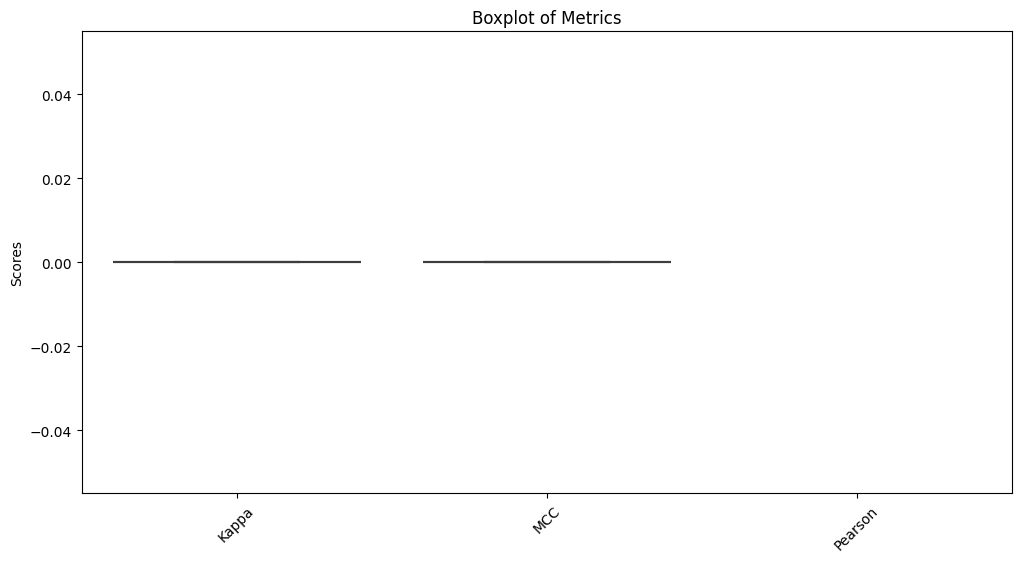

In [394]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Define reverse theme mapping if applicable
reverse_theme_mapping = {}  # Example: {1: 'Theme1', 2: 'Theme2', ...}

def compute_final_labels(df):
    """Compute final labels based on the majority theme."""
    topic_common_themes = df.groupby('Topic_Name')['Theme_Mapped'].apply(lambda x: ','.join(x)).reset_index()
    topic_participant_count = df.groupby('Topic_Name')['Participant email'].nunique().reset_index()
    topic_participant_count.rename(columns={'Participant email': 'Participant_Count'}, inplace=True)
    topic_common_themes = pd.merge(topic_common_themes, topic_participant_count, on='Topic_Name', how='left')

    def calculate_final_label(row):
        themes = pd.Series(row['Theme_Mapped'].split(','))
        theme_counts = themes.value_counts()
        half_participants = row['Participant_Count'] / 2
        common_themes = theme_counts[theme_counts >= half_participants].index
        return ','.join(common_themes) if len(common_themes) > 0 else '0'

    topic_common_themes['Final_Label'] = topic_common_themes.apply(calculate_final_label, axis=1)
    df = pd.merge(df, topic_common_themes[['Topic_Name', 'Final_Label']], on='Topic_Name', how='left')

    # Handle 'NaN' and 'float' values in 'Final_Label'
    if 'Final_Label' not in df.columns:
        df['Final_Label'] = np.nan

    df['Final_Label'] = df['Final_Label'].fillna('0')

    def map_final_label(x):
        if pd.isna(x) or x == '0':
            return 'Unknown'
        return ','.join([reverse_theme_mapping.get(int(val), 'Unknown') for val in x.split(',')])
    
    df['Final_Label_Themes'] = df['Final_Label'].apply(map_final_label)
    
    return df

def multi_label_binarize(df, column):
    """Convert multi-label data into binary format."""
    mlb = MultiLabelBinarizer()
    return mlb.fit_transform(df[column].apply(lambda x: set(map(int, x.split(',')))))

def calculate_agreement_metrics(df):
    """Calculate Cohen's Kappa, MCC, and Pearson Correlation."""
    df = df.dropna(subset=['Theme_Mapped', 'Final_Label'])
    if df.empty:
        return np.nan, np.nan, np.nan

    # Multi-label binarization
    y_true = multi_label_binarize(df, 'Theme_Mapped')
    y_pred = multi_label_binarize(df, 'Final_Label')

    # Check if the shapes match
    if y_true.shape[0] != y_pred.shape[0]:
        raise ValueError(f"Shape mismatch: y_true has {y_true.shape[0]} samples, y_pred has {y_pred.shape[0]} samples.")

    # Flatten binary arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Check if the flattened arrays have the same length
    if len(y_true_flat) != len(y_pred_flat):
        raise ValueError(f"Flattened length mismatch: y_true_flat has {len(y_true_flat)}, y_pred_flat has {len(y_pred_flat)}")

    sample_kappa = cohen_kappa_score(y_true_flat, y_pred_flat)
    sample_mcc = matthews_corrcoef(y_true_flat, y_pred_flat)

    # Handle Pearson Correlation
    if np.all(y_true_flat == y_true_flat[0]) or np.all(y_pred_flat == y_pred_flat[0]):
        sample_pearson = np.nan
    else:
        try:
            sample_pearson, _ = pearsonr(y_true_flat, y_pred_flat)
        except ValueError:
            sample_pearson = np.nan

    return sample_kappa, sample_mcc, sample_pearson

def bootstrap_metrics(df, metric_func, n_bootstraps, with_replacement=True):
    """Perform bootstrapping on the dataset and compute metrics."""
    metrics = []
    data_length = len(df)
    for _ in range(n_bootstraps):
        if with_replacement:
            bootstrapped_df = df.sample(frac=1, replace=True, random_state=np.random.randint(1, 10000))
        else:
            bootstrapped_df = df.sample(n=min(data_length, 1000), replace=False, random_state=np.random.randint(1, 10000))
        bootstrapped_df = compute_final_labels(bootstrapped_df)
        if 'Final_Label' in bootstrapped_df.columns:
            metrics.append(metric_func(bootstrapped_df))
    return metrics

def perform_bootstrapping_and_calculate_metrics(df, n_bootstraps, with_replacement=True):
    metrics = bootstrap_metrics(df, calculate_agreement_metrics, n_bootstraps, with_replacement)
    if metrics:
        avg_metrics = np.mean(metrics, axis=0)
        return avg_metrics
    else:
        return (np.nan, np.nan, np.nan)

def sample_data(df, seed, sample_size=1000):
    """Generate a sample of the dataset."""
    np.random.seed(seed)
    
    # Ensure sample size does not exceed the number of available rows
    if sample_size > len(df):
        sample_size = len(df)
        print(f"Sample size adjusted to {sample_size} because it's larger than the dataset.")

    return df.sample(n=sample_size, random_state=seed, replace=False)

# Define the number of bootstraps and the number of samples
n_bootstraps = 1000
num_samples = 3

# Initialize lists to store metrics
sample_metrics = []

# Load your dataset here
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset path

# Create and process each sample
for sample_index in range(num_samples):
    sample_df = sample_data(df, seed=sample_index + 42)  # Adjust the seed and sample size as needed
    sample_df = compute_final_labels(sample_df)
    try:
        avg_metrics = perform_bootstrapping_and_calculate_metrics(sample_df, n_bootstraps, with_replacement=False)
        sample_metrics.append(avg_metrics)
        
        # Only print results for Sample 1, Sample 2, and Sample 3
        if sample_index < 3:
            print(f'Sample {sample_index + 1} - Average Metrics:')
            print(f'  Kappa: {avg_metrics[0]}')
            print(f'  MCC: {avg_metrics[1]}')
            print(f'  Pearson: {avg_metrics[2]}')
    except ValueError as e:
        print(f"Error processing Sample {sample_index + 1}: {e}")

# Compute and print metrics for the entire dataset
full_df = compute_final_labels(df)
try:
    avg_metrics_full = perform_bootstrapping_and_calculate_metrics(full_df, n_bootstraps, with_replacement=True)
    print('Entire Dataset - Average Metrics:')
    print(f'  Kappa: {avg_metrics_full[0]}')
    print(f'  MCC: {avg_metrics_full[1]}')
    print(f'  Pearson: {avg_metrics_full[2]}')
except ValueError as e:
    print(f"Error processing Entire Dataset: {e}")

# Create DataFrame for boxplot
metrics_df = pd.DataFrame(sample_metrics, columns=['Kappa', 'MCC', 'Pearson'], index=[f'Sample {i+1}' for i in range(num_samples)])
metrics_df.loc['Entire Dataset'] = avg_metrics_full

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=metrics_df)
plt.title('Boxplot of Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()


In [359]:
def bootstrap_metrics(df, metric_func, n_bootstraps=1000):
    metrics = []
    for _ in range(n_bootstraps):
        # Sample data with replacement
        bootstrapped_df = sample_data(df, seed=np.random.randint(1, 10000))
        
        # Compute final labels
        bootstrapped_df = compute_final_labels(bootstrapped_df)
        
        # Check if 'Final_Label' exists
        if 'Final_Label' in bootstrapped_df.columns:
            metrics.append(metric_func(bootstrapped_df))
        else:
            print("Skipping bootstrapped sample due to missing 'Final_Label' column.")
    return metrics



Sample 1 Data:
                                          Topic_Name Theme_Mapped Final_Label  \
0  "corruption and governance in developing count...            0         0,6   
1  "corruption and governance in developing count...          6,0         0,6   
2  "corruption and governance in developing count...          6,0         0,6   
3  "corruption and governance in developing count...            6         0,6   
4  "corruption and governance in developing count...            0         0,6   

  Final_Label_Themes  
0    others,security  
1    others,security  
2    others,security  
3    others,security  
4    others,security  
Sample 1 Metrics:
  Cohen's Kappa: -0.01
  MCC: -0.01
  Pearson Correlation: -0.07

Sample 2 Data:
                                          Topic_Name Theme_Mapped Final_Label  \
0  "corruption and governance in developing count...            0         0,6   
1  "corruption and governance in developing count...            6         0,6   
2  "corruption an

/tmp/ipykernel_4171490/58337699.py:178: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overall_values = melted_results[melted_results['Sample'] == 'Overall'][melted_results['Metric'] == metric]['Value']
/tmp/ipykernel_4171490/58337699.py:181: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(sample_values, overall_values, equal_var=False)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_4171

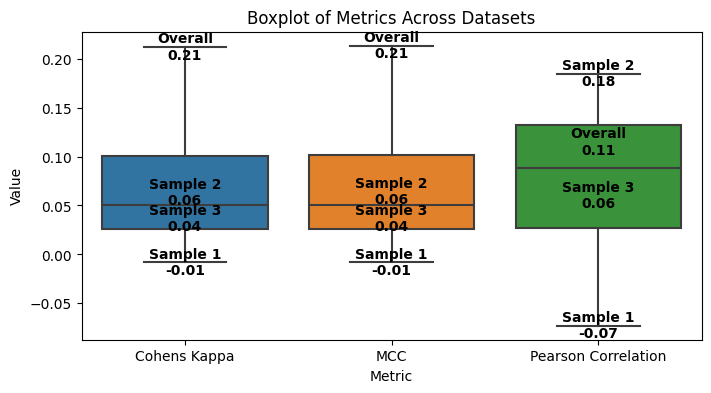

In [99]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is already defined and loaded
df = merged_df.copy()

# Clean the 'Theme' column: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()

# Define the numerical mapping for themes
theme_mapping = {
    'others': 0,
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Map 'Theme' to 'Theme_Mapped'
df['Theme_Mapped'] = df['Theme'].apply(lambda x: ','.join([str(theme_mapping.get(theme.strip(), '0')) for theme in x.split(',')]))

def sample_data(df, seed):
    return df.groupby('Topic_Name').apply(lambda x: x.sample(n=5, random_state=seed, replace=True)).reset_index(drop=True)

def compute_final_labels(df):
    # Group by 'Topic_Name' and aggregate to find the most common theme across all participants
    topic_common_themes = df.groupby('Topic_Name')['Theme_Mapped'].apply(lambda x: ','.join(x)).reset_index()
    
    # Calculate number of participants per topic
    topic_participant_count = df.groupby('Topic_Name')['Participant email'].nunique().reset_index()
    topic_participant_count.rename(columns={'Participant email': 'Participant_Count'}, inplace=True)

    # Merge participant count into topic_common_themes
    topic_common_themes = pd.merge(topic_common_themes, topic_participant_count, on='Topic_Name', how='left')

    # Compute final multilabel based on threshold
    def calculate_final_label(row):
        themes = pd.Series(row['Theme_Mapped'].split(','))
        theme_counts = themes.value_counts()
        half_participants = row['Participant_Count'] / 2
        common_themes = theme_counts[theme_counts >= half_participants].index
        if len(common_themes) == 0:
            return '0'  # Indicate 'Others' if no common theme by half the participants
        return ','.join(common_themes)

    topic_common_themes['Final_Label'] = topic_common_themes.apply(calculate_final_label, axis=1)

    # Merge back the final labels into the original DataFrame
    df = pd.merge(df, topic_common_themes[['Topic_Name', 'Final_Label']], on='Topic_Name', how='left')

    # Map final labels back to theme names
    df['Final_Label_Themes'] = df['Final_Label'].apply(lambda x: ','.join([reverse_theme_mapping.get(int(val), 'Unknown') for val in x.split(',')]))

    return df

def calculate_agreement_metrics(df):
    # Extract original themes and final labels as sets of integers
    df = df.dropna(subset=['Theme_Mapped', 'Final_Label'])
    themes = df['Theme_Mapped'].apply(lambda x: set(map(int, x.split(','))))
    final_labels = df['Final_Label'].apply(lambda x: set(map(int, x.split(','))))

    # Flatten the sets for metric calculation
    themes_flat = [theme for sublist in themes for theme in sublist]
    final_labels_flat = [label for sublist in final_labels for label in sublist]

    # Ensure lengths are equal
    if len(themes_flat) != len(final_labels_flat):
        # If lengths are different, print warning and trim to the minimum length
        min_length = min(len(themes_flat), len(final_labels_flat))
        themes_flat = themes_flat[:min_length]
        final_labels_flat = final_labels_flat[:min_length]
        print(f"Warning: Adjusted lengths for metric calculation. New lengths: {len(themes_flat)}")

    # Calculate Cohen's Kappa
    sample_kappa = cohen_kappa_score(themes_flat, final_labels_flat)

    # Calculate Matthews Correlation Coefficient (MCC)
    sample_mcc = matthews_corrcoef(themes_flat, final_labels_flat)

    # Calculate Pearson Correlation
    sample_correlation, _ = pearsonr(themes_flat, final_labels_flat)

    return sample_kappa, sample_mcc, sample_correlation

# List to store results for samples
sample_results = []
sample_dfs = {}

# Repeat sampling process three times with different seeds
seeds = [42, 43, 44]  # Different seeds for different samples

for i, seed in enumerate(seeds):
    try:
        # Sample 5 participants per topic
        sample_df = sample_data(df, seed)
        
        # Compute final labels and other columns for each sample
        sample_df = compute_final_labels(sample_df)
        
        # Calculate metrics for the sampled participants
        sample_kappa, sample_mcc, sample_correlation = calculate_agreement_metrics(sample_df)
        
        # Store results in the sample_results list
        sample_results.append({
            'Sample': f'Sample {i+1}',
            'Cohens Kappa': sample_kappa,
            'MCC': sample_mcc,
            'Pearson Correlation': sample_correlation
        })
        
        # Store the DataFrame for each sample
        sample_dfs[f'sample{i+1}_df'] = sample_df
        
        # Print sample data and results for verification
        print(f"\nSample {i+1} Data:")
        print(sample_df[['Topic_Name', 'Theme_Mapped', 'Final_Label', 'Final_Label_Themes']].head())
        print(f"Sample {i+1} Metrics:")
        print(f"  Cohen's Kappa: {sample_kappa:.2f}")
        print(f"  MCC: {sample_mcc:.2f}")
        print(f"  Pearson Correlation: {sample_correlation:.2f}")
        
    except ValueError as e:
        print(e)
        continue

# Compute final labels and metrics for the overall dataset
df_overall = compute_final_labels(df)
overall_kappa, overall_mcc, overall_correlation = calculate_agreement_metrics(df_overall)

# Print overall dataset metrics
print("\nOverall Dataset Metrics:")
print(f"  Cohen's Kappa: {overall_kappa:.2f}")
print(f"  MCC: {overall_mcc:.2f}")
print(f"  Pearson Correlation: {overall_correlation:.2f}")

# Prepare data for boxplot
results_df = pd.DataFrame(sample_results + [{
    'Sample': 'Overall',
    'Cohens Kappa': overall_kappa,
    'MCC': overall_mcc,
    'Pearson Correlation': overall_correlation
}])

# Melt DataFrame for easier plotting
melted_results = results_df.melt(id_vars='Sample', value_vars=['Cohens Kappa', 'MCC', 'Pearson Correlation'], var_name='Metric', value_name='Value')

# Create a single boxplot for each metric
plt.figure(figsize=(8, 4))
ax = sns.boxplot(x='Metric', y='Value', data=melted_results)
plt.title('Boxplot of Metrics Across Datasets')

# Annotate with metric scores and dataset names
for i, metric in enumerate(['Cohens Kappa', 'MCC', 'Pearson Correlation']):
    metric_data = melted_results[melted_results['Metric'] == metric]
    for j, sample in enumerate(metric_data['Sample'].unique()):
        sample_data = metric_data[metric_data['Sample'] == sample]['Value']
        mean_value = sample_data.mean()
        ax.text(i, mean_value, f'{sample}\n{mean_value:.2f}', 
                horizontalalignment='center', 
                verticalalignment='center', 
                fontsize=10, 
                weight='bold')

# Perform t-tests between each sample and the overall dataset
for i, seed in enumerate(seeds):
    sample_data = melted_results[melted_results['Sample'] == f'Sample {i+1}']
    for metric in ['Cohens Kappa', 'MCC', 'Pearson Correlation']:
        sample_values = sample_data[sample_data['Metric'] == metric]['Value']
        overall_values = melted_results[melted_results['Sample'] == 'Overall'][melted_results['Metric'] == metric]['Value']
        
        # Perform t-test
        t_stat, p_value = ttest_ind(sample_values, overall_values, equal_var=False)
        print(f"\nT-test for {metric} between Sample {i+1} and Overall Dataset:")
        print(f"  t-statistic: {t_stat:.2f}")
        print(f"  p-value: {p_value:.4f}")

plt.show()



Sample 1 Data:
                                          Topic_Name  \
0  "corruption and governance in developing count...   
1  "corruption and governance in developing count...   
2  "corruption and governance in developing count...   
3  "corruption and governance in developing count...   
4  "corruption and governance in developing count...   

                                    Bertscore_Labels Final_Label  \
0  [education, poverty, hunger, security, health,...         0,6   
1  [education, poverty, hunger, security, health,...         0,6   
2  [education, poverty, hunger, security, health,...         0,6   
3  [education, poverty, hunger, security, health,...         0,6   
4  [education, poverty, hunger, security, health,...         0,6   

  Final_Label_Themes  
0    others,security  
1    others,security  
2    others,security  
3    others,security  
4    others,security  
Sample 1 Metrics:
  Cohen's Kappa: -0.03
  MCC: -0.03
  Pearson Correlation: 0.06

Sample 2 Data:
  

/tmp/ipykernel_4171490/598493051.py:189: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overall_values = melted_results[melted_results['Sample'] == 'Overall'][melted_results['Metric'] == metric]['Value']
/tmp/ipykernel_4171490/598493051.py:192: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(sample_values, overall_values, equal_var=False)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/tmp/ipykernel_41

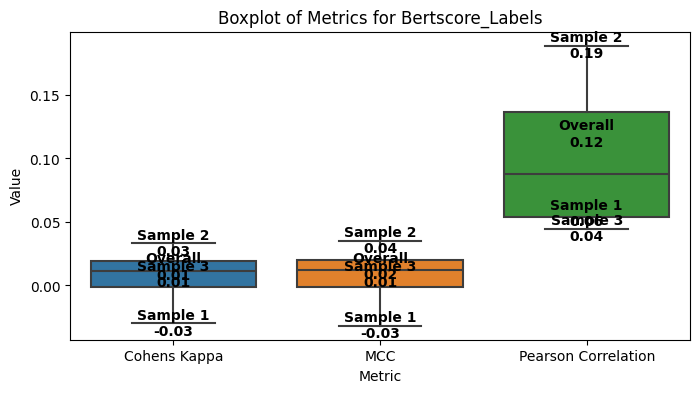

In [122]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is already defined and loaded
df = merged_df.copy()

# Clean the 'Theme' column: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()

# Define the numerical mapping for themes
theme_mapping = {
    'others': 0,
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Map 'Theme' to 'Theme_Mapped'
df['Theme_Mapped'] = df['Theme'].apply(lambda x: ','.join([str(theme_mapping.get(theme.strip(), '0')) for theme in x.split(',')]))

def sample_data(df, seed):
    return df.groupby('Topic_Name').apply(lambda x: x.sample(n=5, random_state=seed, replace=True)).reset_index(drop=True)

def compute_final_labels(df):
    # Group by 'Topic_Name' and aggregate to find the most common theme across all participants
    topic_common_themes = df.groupby('Topic_Name')['Theme_Mapped'].apply(lambda x: ','.join(x)).reset_index()
    
    # Calculate number of participants per topic
    topic_participant_count = df.groupby('Topic_Name')['Participant email'].nunique().reset_index()
    topic_participant_count.rename(columns={'Participant email': 'Participant_Count'}, inplace=True)

    # Merge participant count into topic_common_themes
    topic_common_themes = pd.merge(topic_common_themes, topic_participant_count, on='Topic_Name', how='left')

    # Compute final multilabel based on threshold
    def calculate_final_label(row):
        themes = pd.Series(row['Theme_Mapped'].split(','))
        theme_counts = themes.value_counts()
        half_participants = row['Participant_Count'] / 2
        common_themes = theme_counts[theme_counts >= half_participants].index
        if len(common_themes) == 0:
            return '0'  # Indicate 'Others' if no common theme by half the participants
        return ','.join(common_themes)

    topic_common_themes['Final_Label'] = topic_common_themes.apply(calculate_final_label, axis=1)

    # Merge back the final labels into the original DataFrame
    df = pd.merge(df, topic_common_themes[['Topic_Name', 'Final_Label']], on='Topic_Name', how='left')

    # Map final labels back to theme names
    df['Final_Label_Themes'] = df['Final_Label'].apply(lambda x: ','.join([reverse_theme_mapping.get(int(val), 'Unknown') for val in x.split(',')]))

    return df

def calculate_agreement_metrics(df):
    # Drop rows with missing data
    df = df.dropna(subset=['Bertscore_Labels', 'Final_Label_Themes'])
    
    # Convert lists in 'Predicted_Categories3' to comma-separated strings
    if isinstance(df['Bertscore_Labels'].iloc[0], list):
        df['Bertscore_Labels'] = df['Bertscore_Labels'].apply(lambda x: ','.join(x))
    
    # Convert lists in 'Final_Label_Themes' to comma-separated strings if needed
    if isinstance(df['Final_Label_Themes'].iloc[0], list):
        df['Final_Label_Themes'] = df['Final_Label_Themes'].apply(lambda x: ','.join(x))
    
    # Convert themes to sets of integers
    predicted_labels = df['Bertscore_Labels'].apply(lambda x: set(theme_mapping.get(theme.strip(), 0) for theme in x.split(',')))
    final_labels = df['Final_Label_Themes'].apply(lambda x: set(theme_mapping.get(theme.strip(), 0) for theme in x.split(',')))

    # Flatten the sets for metric calculation
    predicted_labels_flat = [label for sublist in predicted_labels for label in sublist]
    final_labels_flat = [label for sublist in final_labels for label in sublist]

    # Ensure lengths are equal
    if len(predicted_labels_flat) != len(final_labels_flat):
        # If lengths are different, print warning and trim to the minimum length
        min_length = min(len(predicted_labels_flat), len(final_labels_flat))
        predicted_labels_flat = predicted_labels_flat[:min_length]
        final_labels_flat = final_labels_flat[:min_length]
        print(f"Warning: Adjusted lengths for metric calculation. New lengths: {len(predicted_labels_flat)}")

    # Calculate Cohen's Kappa
    sample_kappa = cohen_kappa_score(predicted_labels_flat, final_labels_flat)

    # Calculate Matthews Correlation Coefficient (MCC)
    sample_mcc = matthews_corrcoef(predicted_labels_flat, final_labels_flat)

    # Calculate Pearson Correlation
    sample_correlation, _ = pearsonr(predicted_labels_flat, final_labels_flat)

    return sample_kappa, sample_mcc, sample_correlation


# List to store results for samples
sample_results = []
sample_dfs = {}

# Repeat sampling process three times with different seeds
seeds = [42, 43, 44]  # Different seeds for different samples

for i, seed in enumerate(seeds):
    try:
        # Sample 5 participants per topic
        sample_df = sample_data(df, seed)
        
        # Compute final labels and other columns for each sample
        sample_df = compute_final_labels(sample_df)
        
        # Calculate metrics for the sampled participants
        sample_kappa, sample_mcc, sample_correlation = calculate_agreement_metrics(sample_df)
        
        # Store results in the sample_results list
        sample_results.append({
            'Sample': f'Sample {i+1}',
            'Cohens Kappa': sample_kappa,
            'MCC': sample_mcc,
            'Pearson Correlation': sample_correlation
        })
        
        # Store the DataFrame for each sample
        sample_dfs[f'sample{i+1}_df'] = sample_df
        
        # Print sample data and results for verification
        print(f"\nSample {i+1} Data:")
        print(sample_df[['Topic_Name', 'Bertscore_Labels', 'Final_Label', 'Final_Label_Themes']].head())
        print(f"Sample {i+1} Metrics:")
        print(f"  Cohen's Kappa: {sample_kappa:.2f}")
        print(f"  MCC: {sample_mcc:.2f}")
        print(f"  Pearson Correlation: {sample_correlation:.2f}")
        
    except ValueError as e:
        print(e)
        continue

# Compute final labels and metrics for the overall dataset
df_overall = compute_final_labels(df)
overall_kappa, overall_mcc, overall_correlation = calculate_agreement_metrics(df_overall)

# Print overall dataset metrics
print("\nOverall Dataset Metrics:")
print(f"  Cohen's Kappa: {overall_kappa:.2f}")
print(f"  MCC: {overall_mcc:.2f}")
print(f"  Pearson Correlation: {overall_correlation:.2f}")

# Prepare data for boxplot
results_df = pd.DataFrame(sample_results + [{
    'Sample': 'Overall',
    'Cohens Kappa': overall_kappa,
    'MCC': overall_mcc,
    'Pearson Correlation': overall_correlation
}])

# Melt DataFrame for easier plotting
melted_results = results_df.melt(id_vars='Sample', value_vars=['Cohens Kappa', 'MCC', 'Pearson Correlation'], var_name='Metric', value_name='Value')

# Create a single boxplot for each metric
plt.figure(figsize=(8, 4))
ax = sns.boxplot(x='Metric', y='Value', data=melted_results)
plt.title('Boxplot of Metrics for Bertscore_Labels')

# Annotate with metric scores and dataset names
for i, metric in enumerate(['Cohens Kappa', 'MCC', 'Pearson Correlation']):
    metric_data = melted_results[melted_results['Metric'] == metric]
    for j, sample in enumerate(metric_data['Sample'].unique()):
        sample_data = metric_data[metric_data['Sample'] == sample]['Value']
        mean_value = sample_data.mean()
        ax.text(i, mean_value, f'{sample}\n{mean_value:.2f}', 
                horizontalalignment='center', 
                verticalalignment='center', 
                fontsize=10, 
                weight='bold')

# Perform t-tests between each sample and the overall dataset
for i, seed in enumerate(seeds):
    sample_data = melted_results[melted_results['Sample'] == f'Sample {i+1}']
    for metric in ['Cohens Kappa', 'MCC', 'Pearson Correlation']:
        sample_values = sample_data[sample_data['Metric'] == metric]['Value']
        overall_values = melted_results[melted_results['Sample'] == 'Overall'][melted_results['Metric'] == metric]['Value']
        
        # Perform t-test
        t_stat, p_value = ttest_ind(sample_values, overall_values, equal_var=False)
        print(f"\nT-test for {metric} between Sample {i+1} and Overall Dataset:")
        print(f"  t-statistic: {t_stat:.2f}")
        print(f"  p-value: {p_value:.4f}")

plt.show()
